## Problem Statement

##### Data Set Information

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017

#### Attribute Information :

For more information, read [Cho et al, 2020].

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T


Target Variables

1. Next_Tmax: Next Day Minimum Temperature
2. Next_Tmin: Next Day Minimum Temperature

##### IMPORTING REQUIRED LIBARIES FOR EDA, DATA CLEANING AND WRANGLING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
import codecs
from sklearn.neighbors import KNeighborsRegressor

##### IMPORTING CSV FILE TO JUPYTER NOTEBOOK

In [2]:
tf_df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
tf_df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [3]:
tf_df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [4]:
tf_df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [5]:
tf_df.shape

(7752, 25)

In [6]:
tf_df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [7]:
tf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [8]:
tf_df.columns.to_series().groupby(tf_df.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], object: ['Date']}

- All variable are Numerical in nature.
- Next_Tmax and Next_Tmin are Target Variable.
- This dataset contain 7752 Rows and 25 Columns

### Statistical Analysis

In [9]:
tf_df.duplicated().sum()

0

In [10]:
tf_df.isin([' ','NA','-']).sum().any()

False

- No Duplicate entry in Dataset
- No Whitespace, NA,'-' exist in dataset

### Checking Missing Values

In [11]:
tf_df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [12]:
tf_df.isnull().sum().sum()

1248

In [13]:
missing_values = tf_df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(tf_df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
LDAPS_CC3                     75        0.967492
LDAPS_PPT4                    75        0.967492
LDAPS_PPT2                    75        0.967492
LDAPS_PPT1                    75        0.967492
LDAPS_CC4                     75        0.967492
LDAPS_CC2                     75        0.967492
LDAPS_CC1                     75        0.967492
LDAPS_LH                      75        0.967492
LDAPS_WS                      75        0.967492
LDAPS_Tmin_lapse              75        0.967492
LDAPS_Tmax_lapse              75        0.967492
LDAPS_RHmax                   75        0.967492
LDAPS_RHmin                   75        0.967492
LDAPS_PPT3                    75        0.967492
Present_Tmin                  70        0.902993
Present_Tmax                  70        0.902993
Next_Tmax                     27        0.348297
Next_Tmin                     27        0.348297
Date                           2        0.025800
station             

As missing values present are less than 1%. So We can directly drop these missing values.

In [14]:
print("We had {} Rows and {} Columns before dropping null values.".format(tf_df.shape[0], tf_df.shape[1]))
tf_df.dropna(inplace=True)
print("We have {} Rows and {} Columns after dropping null values.".format(tf_df.shape[0], tf_df.shape[1]))

We had 7752 Rows and 25 Columns before dropping null values.
We have 7588 Rows and 25 Columns after dropping null values.


In [15]:
tf_df['Date']=pd.to_datetime(tf_df['Date'])
tf_df['Day']=tf_df['Date'].apply(lambda x:x.day)
tf_df['Month']=tf_df['Date'].apply(lambda x:x.month)
tf_df['Year']=tf_df['Date'].apply(lambda x:x.year)
tf_df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887   69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890   51.937448  ...  37.6046   
2         30.091292         24.565633  6.138224   20.573050  ...  37.5776   
3         29.704629         23.326177  5.650050   65.727144  ...  37.6450   
4         29.113934         23.486480  5.735004  107.965535  ...  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  Day  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2   30   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5   30   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9   30   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3   30   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5   30   

   Month  Year  
0      6  2013  
1      6  2013  
2      6  2013  
3      6  2013  
4      6  2013  

[5 rows x 28 columns]

In [16]:
tf_df['Month'].unique()

array([6, 7, 8], dtype=int64)

In [17]:
import reverse_geocoder as rg
import pprint

In [18]:
geodata=[]
def reverse_geocoordinates(coordinates):
    result = rg.search(coordinates)
    return (result)

if __name__=="__main__":
    coordinates = list(zip(tf_df['lat'], tf_df['lon']))
    data = reverse_geocoordinates(coordinates)
    geodata.append(data)
# Creating dataframe for geographical name
geo_names = pd.DataFrame(geodata).transpose()

Loading formatted geocoded file...


In [19]:
tf_df['State']= geo_names[0].apply(lambda x:x.get('admin1'))
tf_df['City']=geo_names[0].apply(lambda x:x.get('name'))

In [20]:
tf_df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...       DEM  \
0         28.074101         23.006936  6.818887   69.451805  ...  212.3350   
1         29.850689         24.035009  5.691890   51.937448  ...   44.7624   
2         30.091292         24.565633  6.138224   20.573050  ...   33.3068   
3         29.704629         23.326177  5.650050   65.727144  ...   45.7160   
4         29.113934         23.486480  5.735004  107.965535  ...   35.0380   

    Slope  Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  \
0  2.7850      5992.895996       29.1       21.2   30      6  2013   
1  0.5141      5869.312500       30.5       22.5   30      6  2013   
2  0.2661      5863.555664       31.1       23.9   30      6  2013   
3  2.5348      5856.964844       31.7       24.3   30      6  2013   
4  0.5055      5859.552246       31.2       22.5   30      6  2013   

         State     City  
0        Seoul    Seoul  
1        Seoul    Seoul  
2        Seoul    Seoul  
3        Seoul    Seoul  
4  Gyeonggi-do  Guri-si  

[5 rows x 30 columns]

In [21]:
tf_df.describe().T

count                           mean                  min  \
station           7588.0                      13.014101                  1.0   
Date                7588  2015-07-27 18:22:12.208750592  2013-06-30 00:00:00   
Present_Tmax      7588.0                      29.748366                 20.0   
Present_Tmin      7588.0                      23.195809                 11.3   
LDAPS_RHmin       7588.0                      56.724969            19.794666   
LDAPS_RHmax       7588.0                      88.360823            58.936283   
LDAPS_Tmax_lapse  7588.0                      29.620128            17.624954   
LDAPS_Tmin_lapse  7588.0                      23.511786            14.272646   
LDAPS_WS          7588.0                       7.094097              2.88258   
LDAPS_LH          7588.0                      62.492606           -13.603212   
LDAPS_CC1         7588.0                        0.36851                  0.0   
LDAPS_CC2         7588.0                       0.355528                  0.0   
LDAPS_CC3         7588.0                       0.317546                  0.0   
LDAPS_CC4         7588.0                       0.298268                  0.0   
LDAPS_PPT1        7588.0                       0.589008                  0.0   
LDAPS_PPT2        7588.0                       0.480738                  0.0   
LDAPS_PPT3        7588.0                       0.275007                  0.0   
LDAPS_PPT4        7588.0                       0.265373                  0.0   
lat               7588.0                      37.544792              37.4562   
lon               7588.0                      126.99142              126.826   
DEM               7588.0                      61.918136                12.37   
Slope             7588.0                       1.259755               0.0985   
Solar radiation   7588.0                    5343.724208          4329.520508   
Next_Tmax         7588.0                      30.241526                 17.4   
Next_Tmin         7588.0                       22.91082                 11.3   
Day               7588.0                       15.93951                  1.0   
Month             7588.0                       7.465999                  6.0   
Year              7588.0                    2014.991697               2013.0   

                                  25%                  50%  \
station                           7.0                 13.0   
Date              2014-07-15 00:00:00  2015-07-29 00:00:00   
Present_Tmax                     27.8                 29.9   
Present_Tmin                     21.6                 23.4   
LDAPS_RHmin                 45.960243            55.023199   
LDAPS_RHmax                 84.203724            89.784122   
LDAPS_Tmax_lapse            27.673756            29.709537   
LDAPS_Tmin_lapse             22.08682            23.758249   
LDAPS_WS                     5.675358             6.547838   
LDAPS_LH                    37.206201            56.898324   
LDAPS_CC1                    0.146546             0.315706   
LDAPS_CC2                    0.140324             0.311676   
LDAPS_CC3                     0.10095             0.261795   
LDAPS_CC4                    0.081495             0.227459   
LDAPS_PPT1                        0.0                  0.0   
LDAPS_PPT2                        0.0                  0.0   
LDAPS_PPT3                        0.0                  0.0   
LDAPS_PPT4                        0.0                  0.0   
lat                           37.5102              37.5507   
lon                           126.937              126.995   
DEM                              28.7               45.716   
Slope                          0.2713                0.618   
Solar radiation           5001.485717          5441.987305   
Next_Tmax                        28.2                 30.4   
Next_Tmin                        21.3                 23.1   
Day                               8.0                 16.0   
Month                   

### Exploring Present Temperature

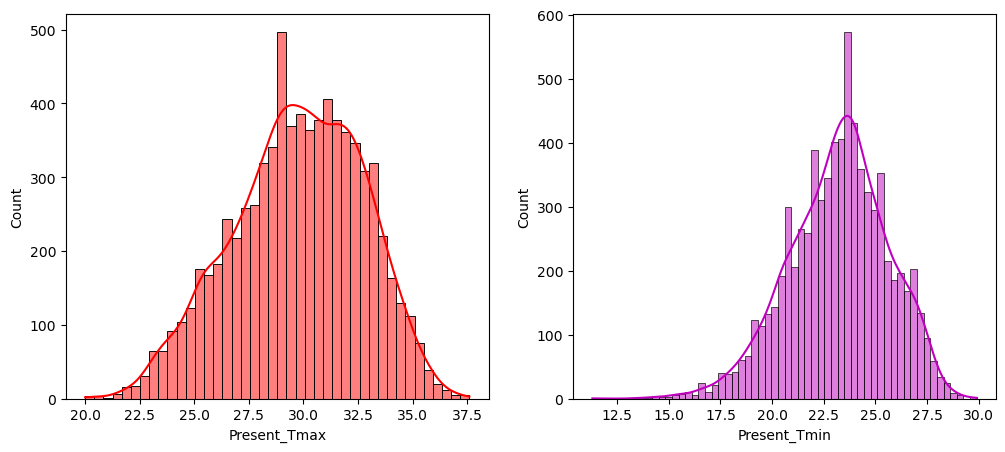

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(tf_df['Present_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(tf_df['Present_Tmin'],kde=True,color='m')
plt.show()

- For majority of reading Present Temperature Maximum varies in between 27.5 to 32.5 degree.
- For majority of reading Present Temperature Minimum varies in between 22.5 to 26 degree.

#### Finding Maximum and Minimum Temperature Over Period

In [23]:
print('Present Maximum Temperature Maxima in year 2013-2016 :',tf_df.Present_Tmax.max())
print('Present Maximum Temperature Minima in year 2013-2016 :',tf_df.Present_Tmax.min())
print(' Average Present Maximum Temperature in year 2013-2016 :',tf_df.Present_Tmax.mean())
print('='*100)
print('Present Minimum Temperature Maxima in year 2013-2016 :',tf_df.Present_Tmin.max())
print('Present Minimum Temperature Minima in year 2013-2016 :',tf_df.Present_Tmin.min())
print('Average Present Minimum Temperature in year 2013-2016 :',tf_df.Present_Tmin.mean())

Present Maximum Temperature Maxima in year 2013-2016 : 37.6
Present Maximum Temperature Minima in year 2013-2016 : 20.0
 Average Present Maximum Temperature in year 2013-2016 : 29.748365840801263
Present Minimum Temperature Maxima in year 2013-2016 : 29.9
Present Minimum Temperature Minima in year 2013-2016 : 11.3
Average Present Minimum Temperature in year 2013-2016 : 23.195809172377437


In [24]:
pd.set_option('display.max_columns', None)
tf_df.loc[tf_df.Present_Tmax==tf_df.Present_Tmax.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
5717     18.0 2016-08-11          37.6          26.8    44.254253   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
5717    87.745514         34.794021         27.150764  6.366598  111.225118   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
5717   0.218892   0.094288   0.004283   0.000343         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
5717         0.0         0.0  37.4832  127.024  56.4448  1.2313   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year        State  \
5717      5082.563477       37.0       27.8   11      8  2016  Gyeonggi-do   

            City  
5717  Bucheon-si

In [25]:
tf_df.loc[tf_df.Present_Tmax==tf_df.Present_Tmax.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7725      1.0 2017-08-30          20.0          15.1    35.652172   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
7725     89.97319         24.323737         16.128899  7.087329  108.981108   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
7725   0.046182   0.014955        0.0    0.00063         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
7725         0.0         0.0  37.6046  126.991  212.335  2.785   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year State City  
7725       4614.76123       23.8       15.1   30      8  2017   NaN  NaN

In [26]:
tf_df.loc[tf_df.Present_Tmin==tf_df.Present_Tmin.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
2397     23.0 2014-08-02          35.3          29.9    53.946949   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
2397    85.985161         30.912804         25.439537  13.011129  117.837212   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
2397   0.684685   0.448827   0.762858   0.635728    1.670126    0.005681   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
2397    0.248885    0.003176  37.5372  126.891  15.5876  0.1554   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year        State  \
2397      5360.226563       31.3       24.8    2      8  2014  Gyeonggi-do   

         City  
2397  Guri-si

In [27]:
tf_df.loc[tf_df.Present_Tmin==tf_df.Present_Tmin.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
6116     17.0 2016-08-27          27.1          11.3    62.793823   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
6116    91.726936         23.529546         17.963487  7.984566  84.48145   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
6116   0.668264   0.410536   0.452879   0.627238    0.181458         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
6116    0.405181    1.015573  37.6181  127.099  53.4712  0.697   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  State   City  
6116      4539.616699       24.6       17.1   27      8  2016  Seoul  Seoul

- Present Maximum Temperature Maxima over four year span recorded at station 18 on 2016-11-08 with Temp of 37.6 degree. Station 18 Located at Bucheon-si city of Gyeonggido state.
- Present Maximum Temperature Minima over four year span recorded at station 1 on 2017-08-30 with Temp of 20 degree.
- Present Maximum Temperature Maxima over four year span recorded at station 23 on 2014-02-08 with Temp of 29.9 degree. The station 23 is located in Gurisi of Gyeonggido state
- Present Maximum Temperature Minima over four year span recorded at station 17 on 2016-08-27 with Temp of 11.3 degree. The station 17 is located in seoul city.
- We get high value of solar radiation of high temperature day and Low radiation values at low temperature day.
- Maximum Humidity occur when global temeperature minima occur. This might implies that humidity and temperature are inversely related.We will try to verify this.
- Solar radiation has naturally going to have effect on wind speed,precipitation and humidity.

##### Line Plot of Present Temperature Maximum over each Station

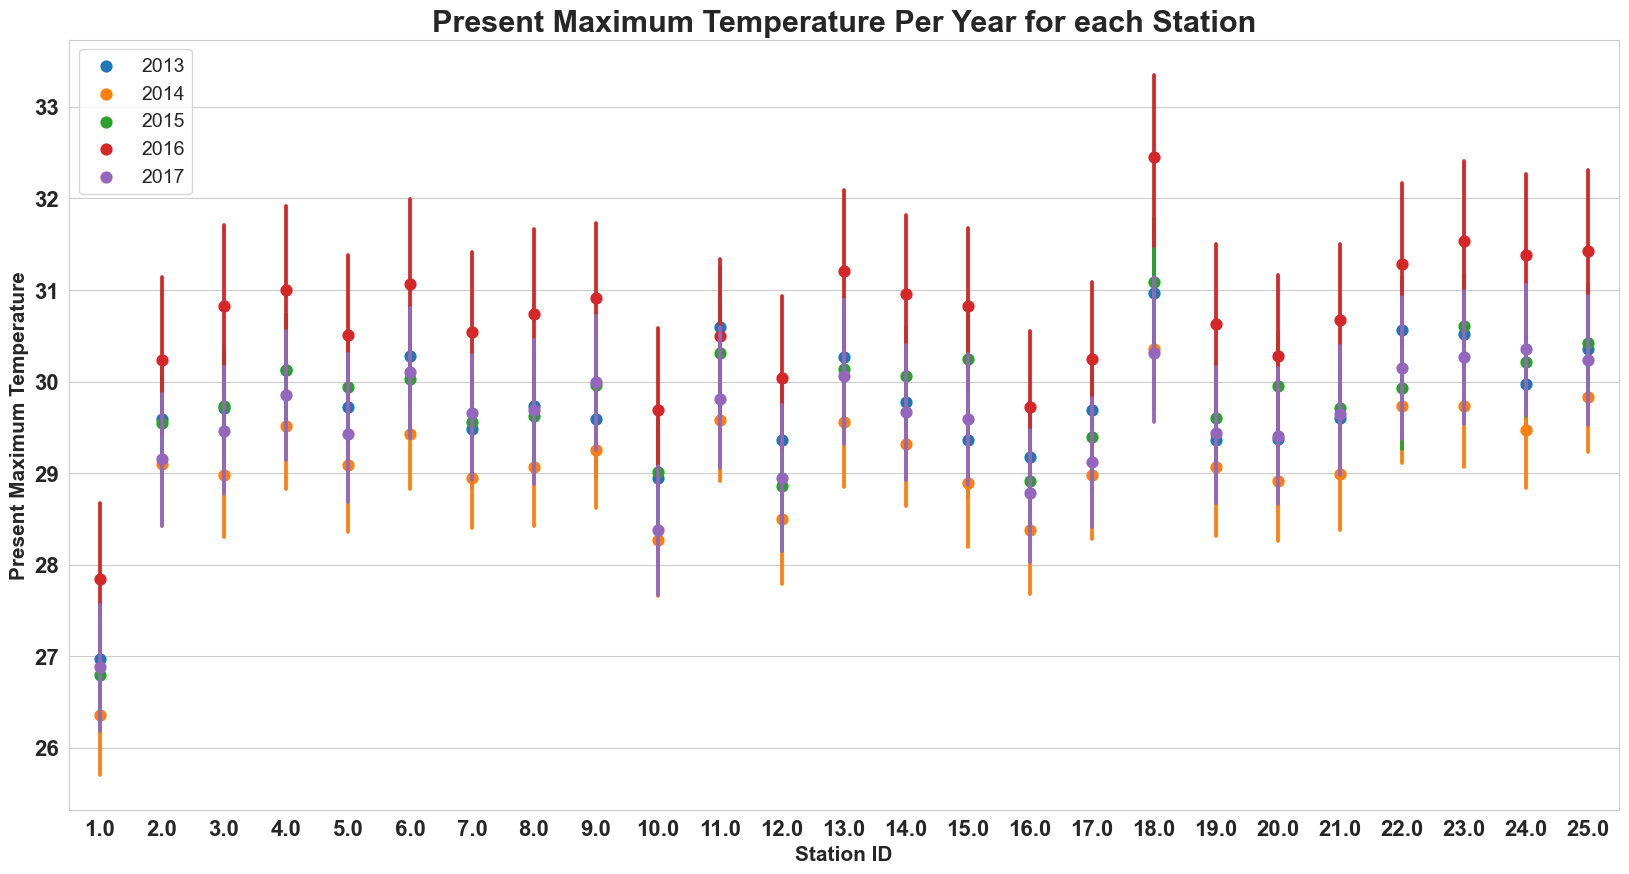

In [28]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmax', data=tf_df, hue='Year',join=False)
plt.title('Present Maximum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Maximum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

- Over all four year higher temperature recorded at station 18 in compare to rest.
- Station 1 is coolest station over all timeframe.
- We can see 2016 is hottest year and 2014 is coolest year. It will be interesting to explore these two year independently.
- Year 2017 is much cooler compare to Year 2016. Precious relife to people in 2017 !!!

Line Plot of Present Temperature Minimum over each Station

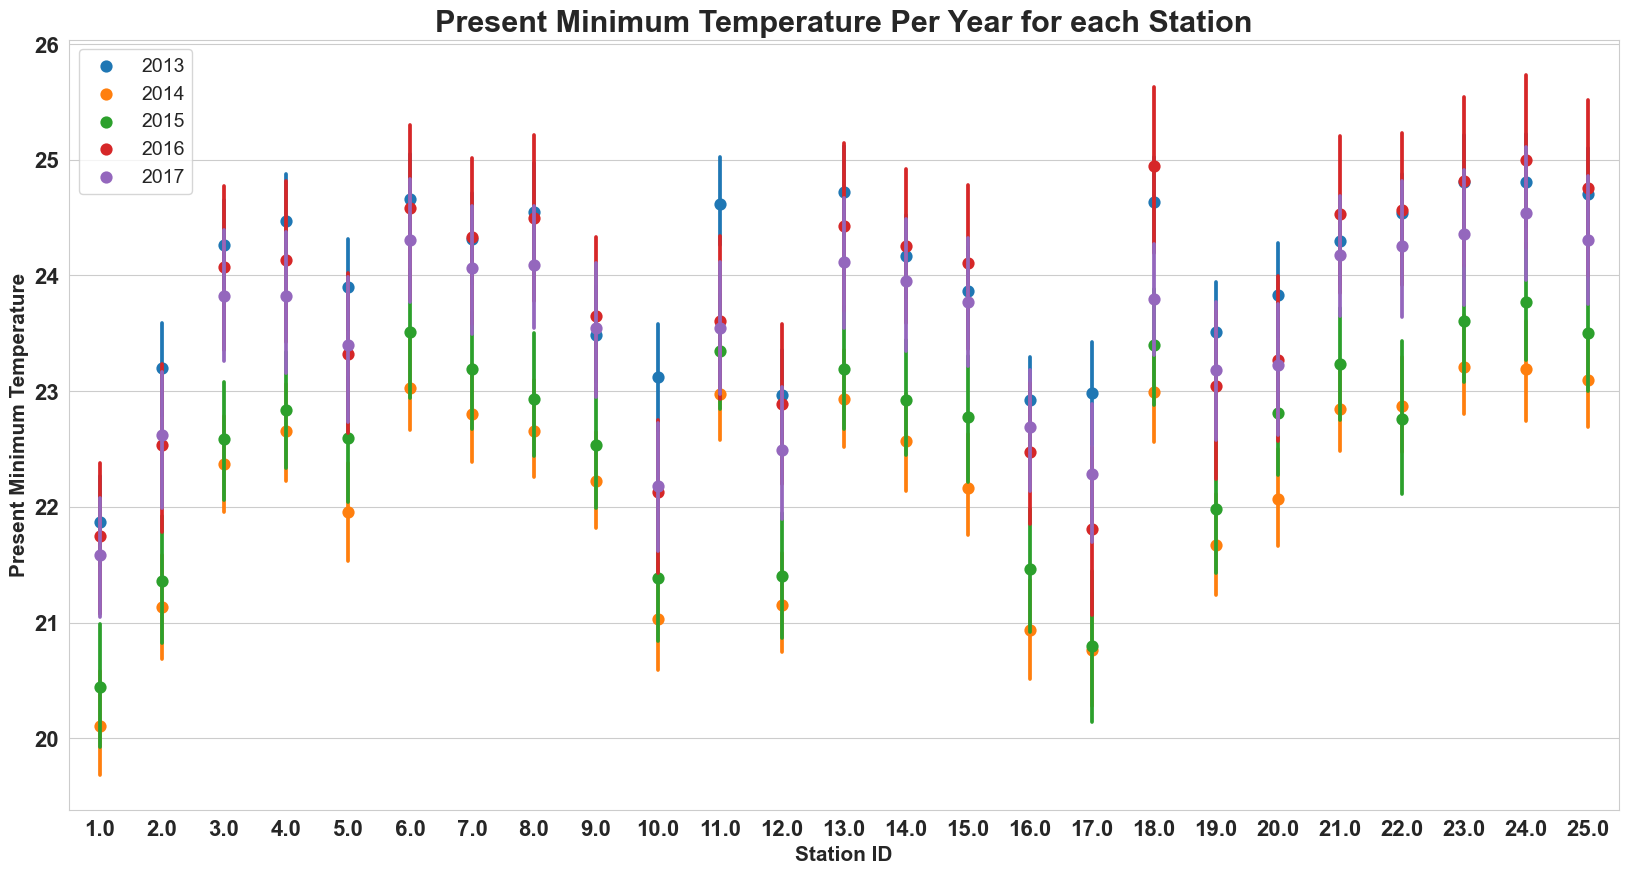

In [29]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmin', data=tf_df, hue='Year',join=False)
plt.title('Present Minimum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Minimum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

- Year 2014 is coolest year of all time frame.
- Highest Present Minimum Temperature recorded at Station 24 inspite of Not having Highest Present Maximum Temperature. This is implies that over day period minimum temperature drop recorded at station 24.
- Station 1 is coolest station of all time followed by station 17. Must be tourist spot in Summer.

<Axes: xlabel='Month', ylabel='Solar radiation'>

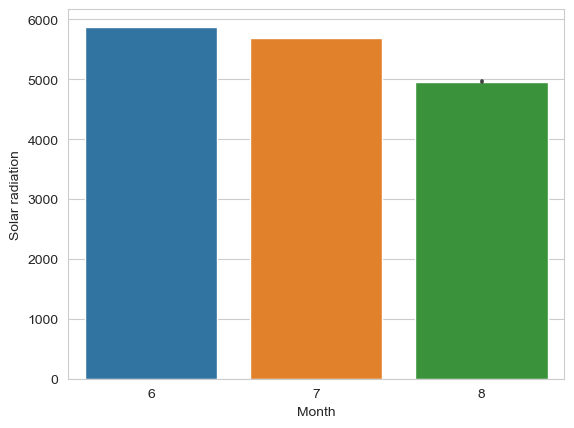

In [30]:
sns.barplot(x=tf_df['Month'], y=tf_df['Solar radiation'])

<Axes: xlabel='Next_Tmax', ylabel='Solar radiation'>

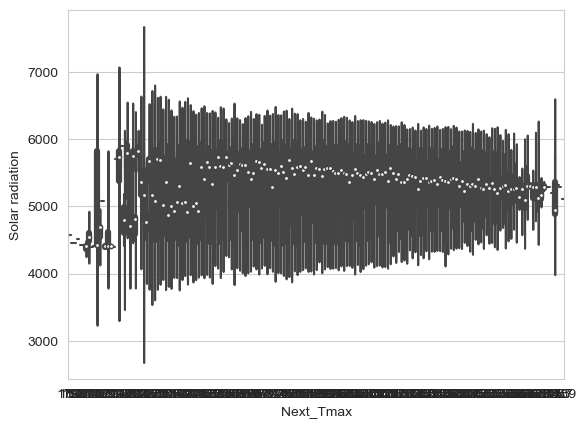

In [31]:
sns.violinplot(x=tf_df['Next_Tmax'], y=tf_df['Solar radiation'])

##### Exploration of Target Variable

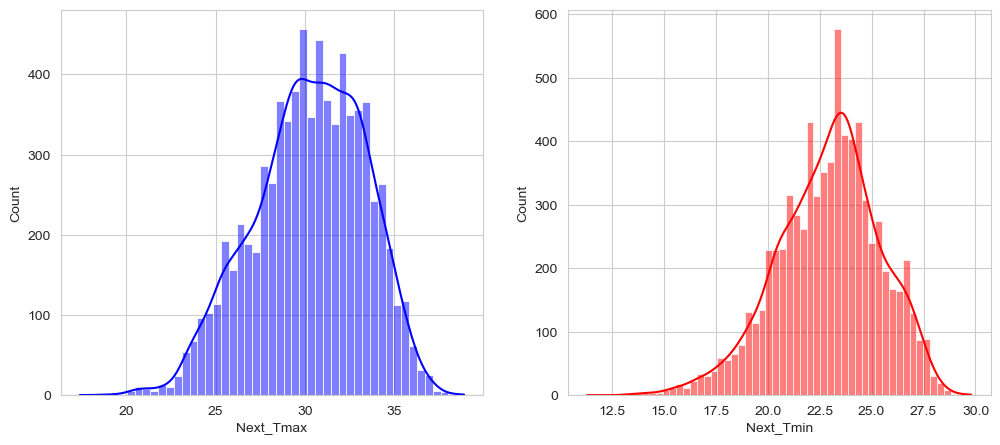

In [32]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(tf_df['Next_Tmax'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(tf_df['Next_Tmin'],kde=True,color='r')
plt.show()

We get same result as we get in case of present temperature.

- For majority of reading Next Temperature Maximum varies in between 27.5 to 32.5 degree.
- For majority of reading Next Temperature Minimum varies in between 22.5 to 26 degree.

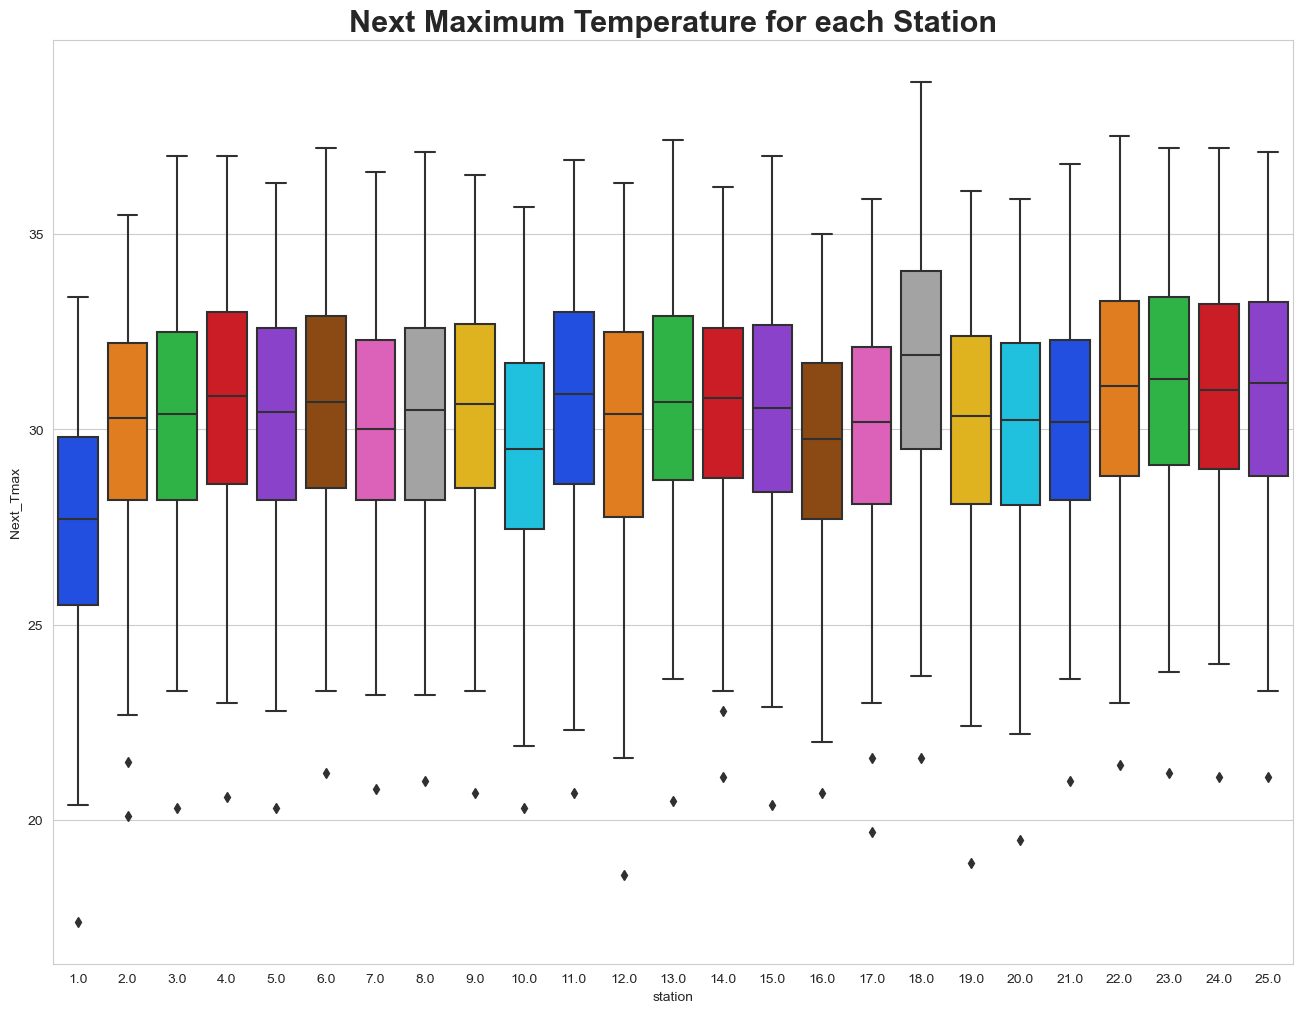

In [33]:
plt.figure(figsize=(16,12))
plt.title('Next Maximum Temperature for each Station', fontsize=22,fontweight='bold')
sns.boxplot(x='station', y = 'Next_Tmax', data = tf_df,palette='bright')
plt.show()

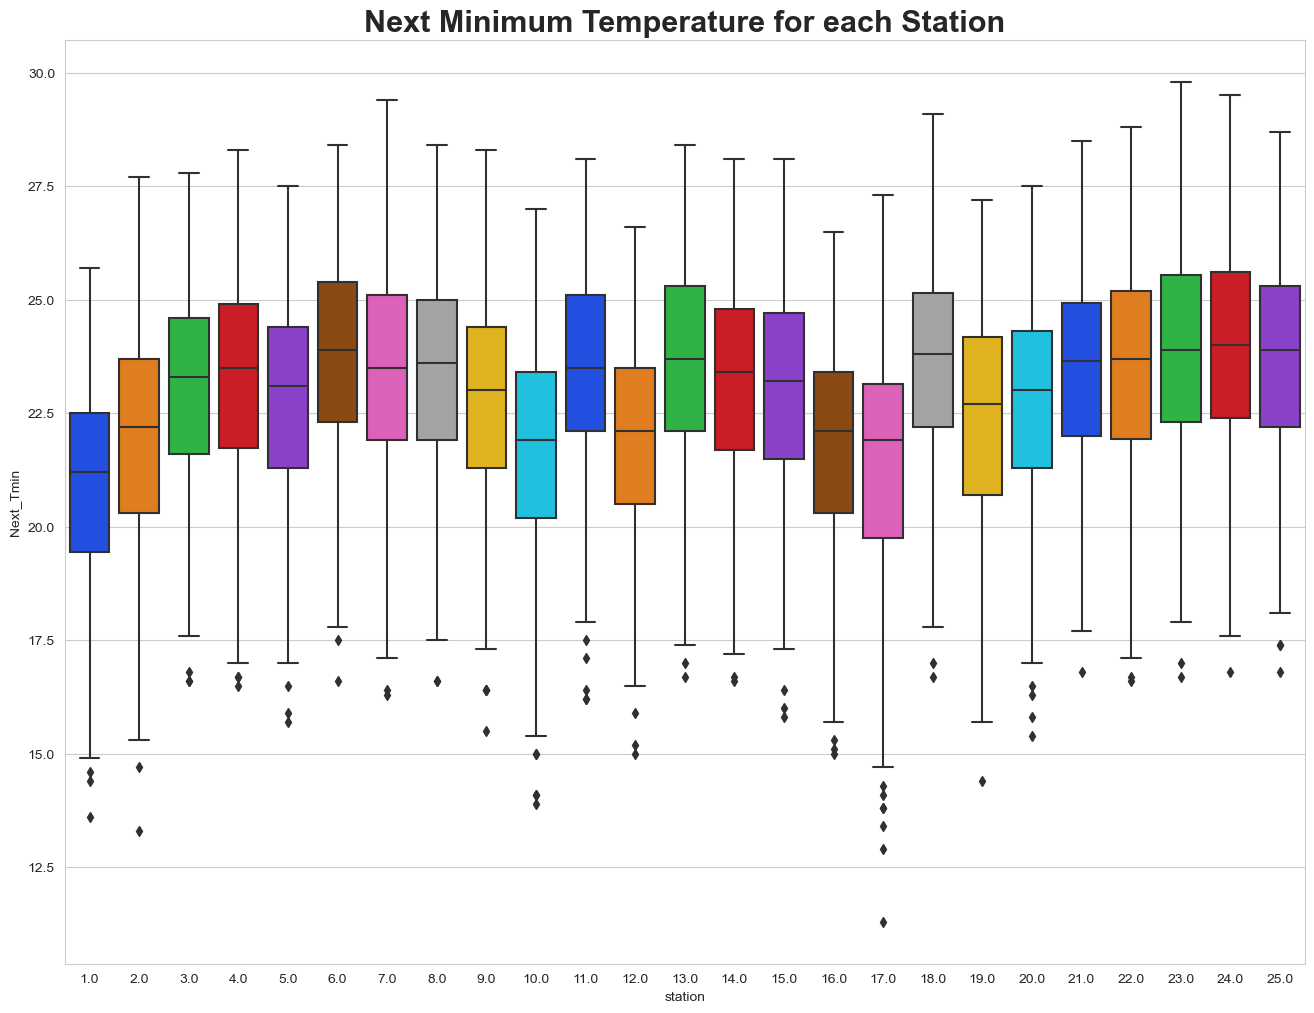

In [34]:
plt.figure(figsize=(16,12))
plt.title('Next Minimum Temperature for each Station', fontsize=22, fontweight='bold')
sns.boxplot(x='station', y = 'Next_Tmin', data = tf_df,palette='bright')
plt.show()

From the box plot

- We can notice the station 18 has highest temperature collection for both Next_Tmax and Next_Tmin targets.
- Maximum temperature difference at same station occur in station 17.

### Next Maximum Temperature Vs Cloud Cover

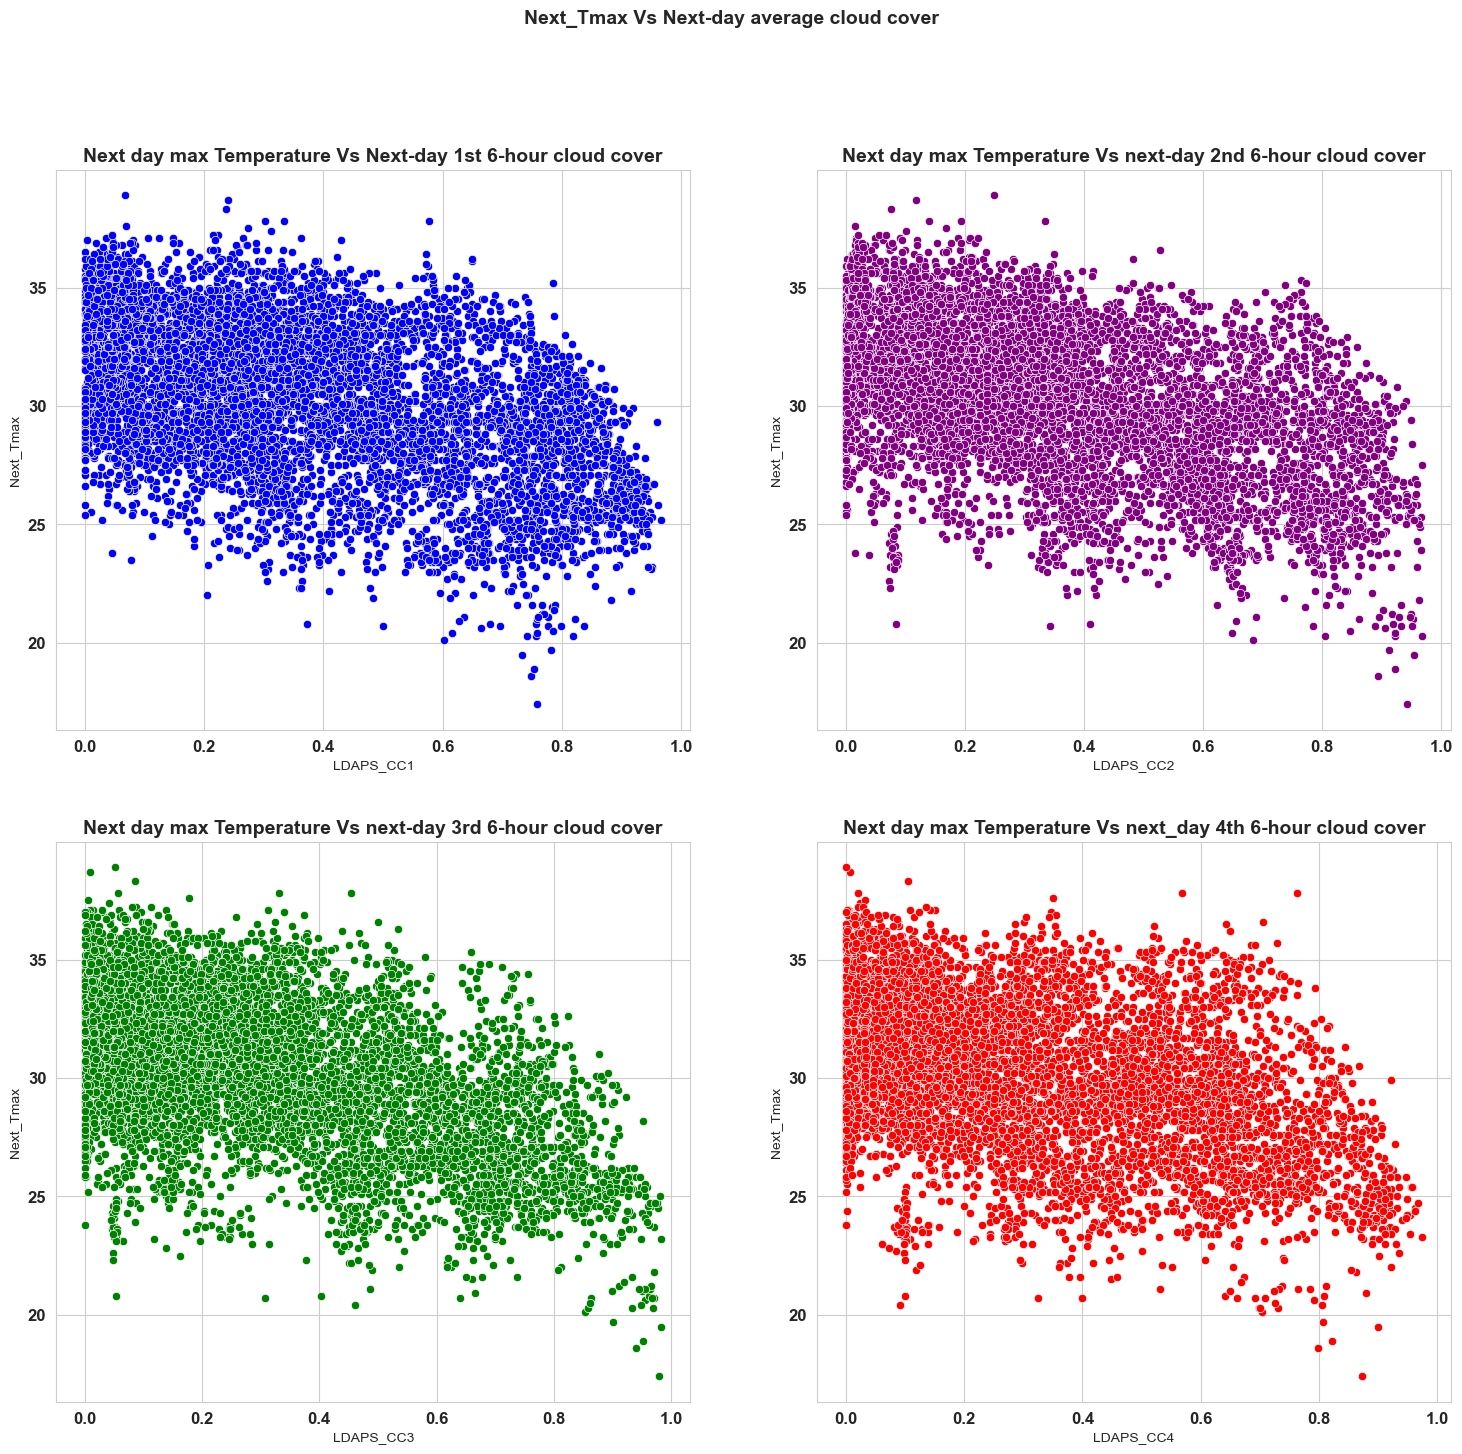

In [35]:
plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmax Vs Next-day average cloud cover',fontsize=14, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=tf_df,color="blue")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=tf_df,color='purple')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day max Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=tf_df,color='green')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day max Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmax',data=tf_df,color="red")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

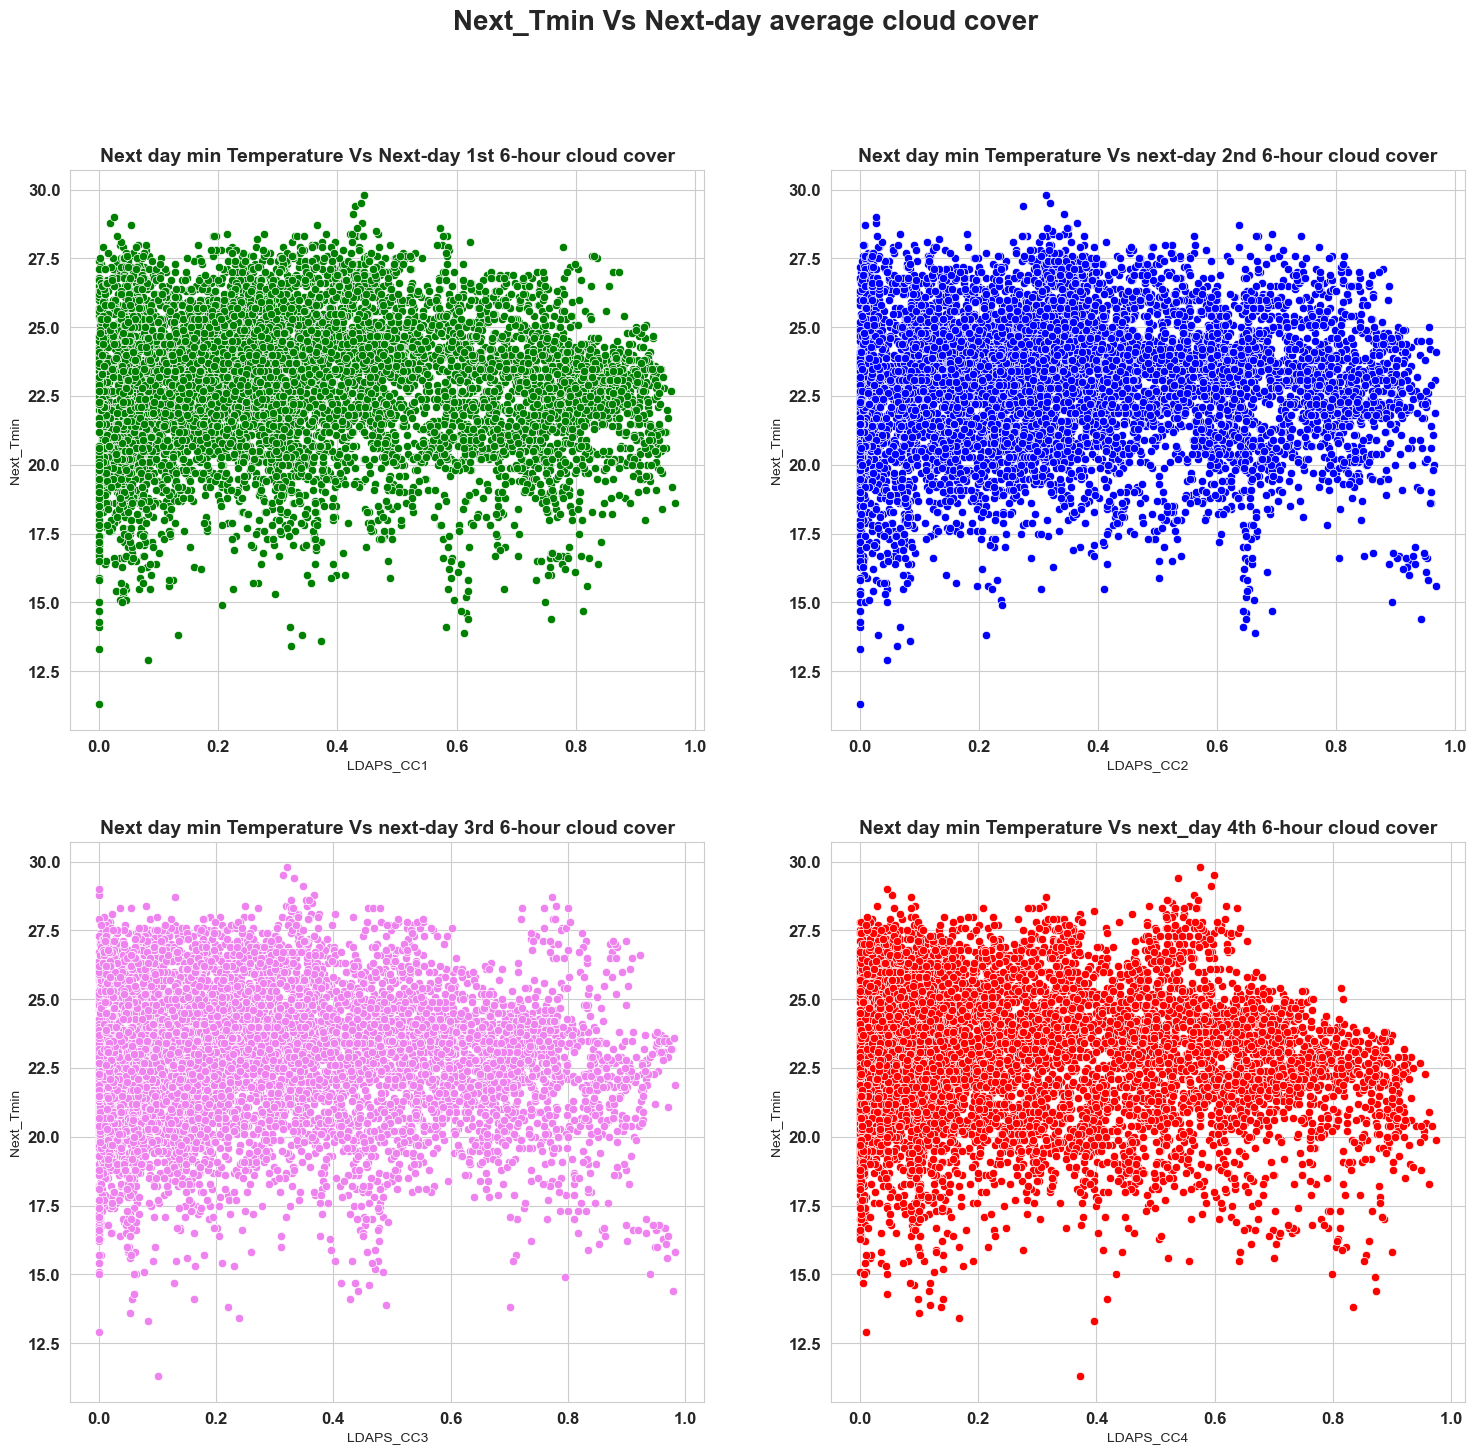

In [36]:
plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmin Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=tf_df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day min Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=tf_df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=tf_df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmin',data=tf_df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

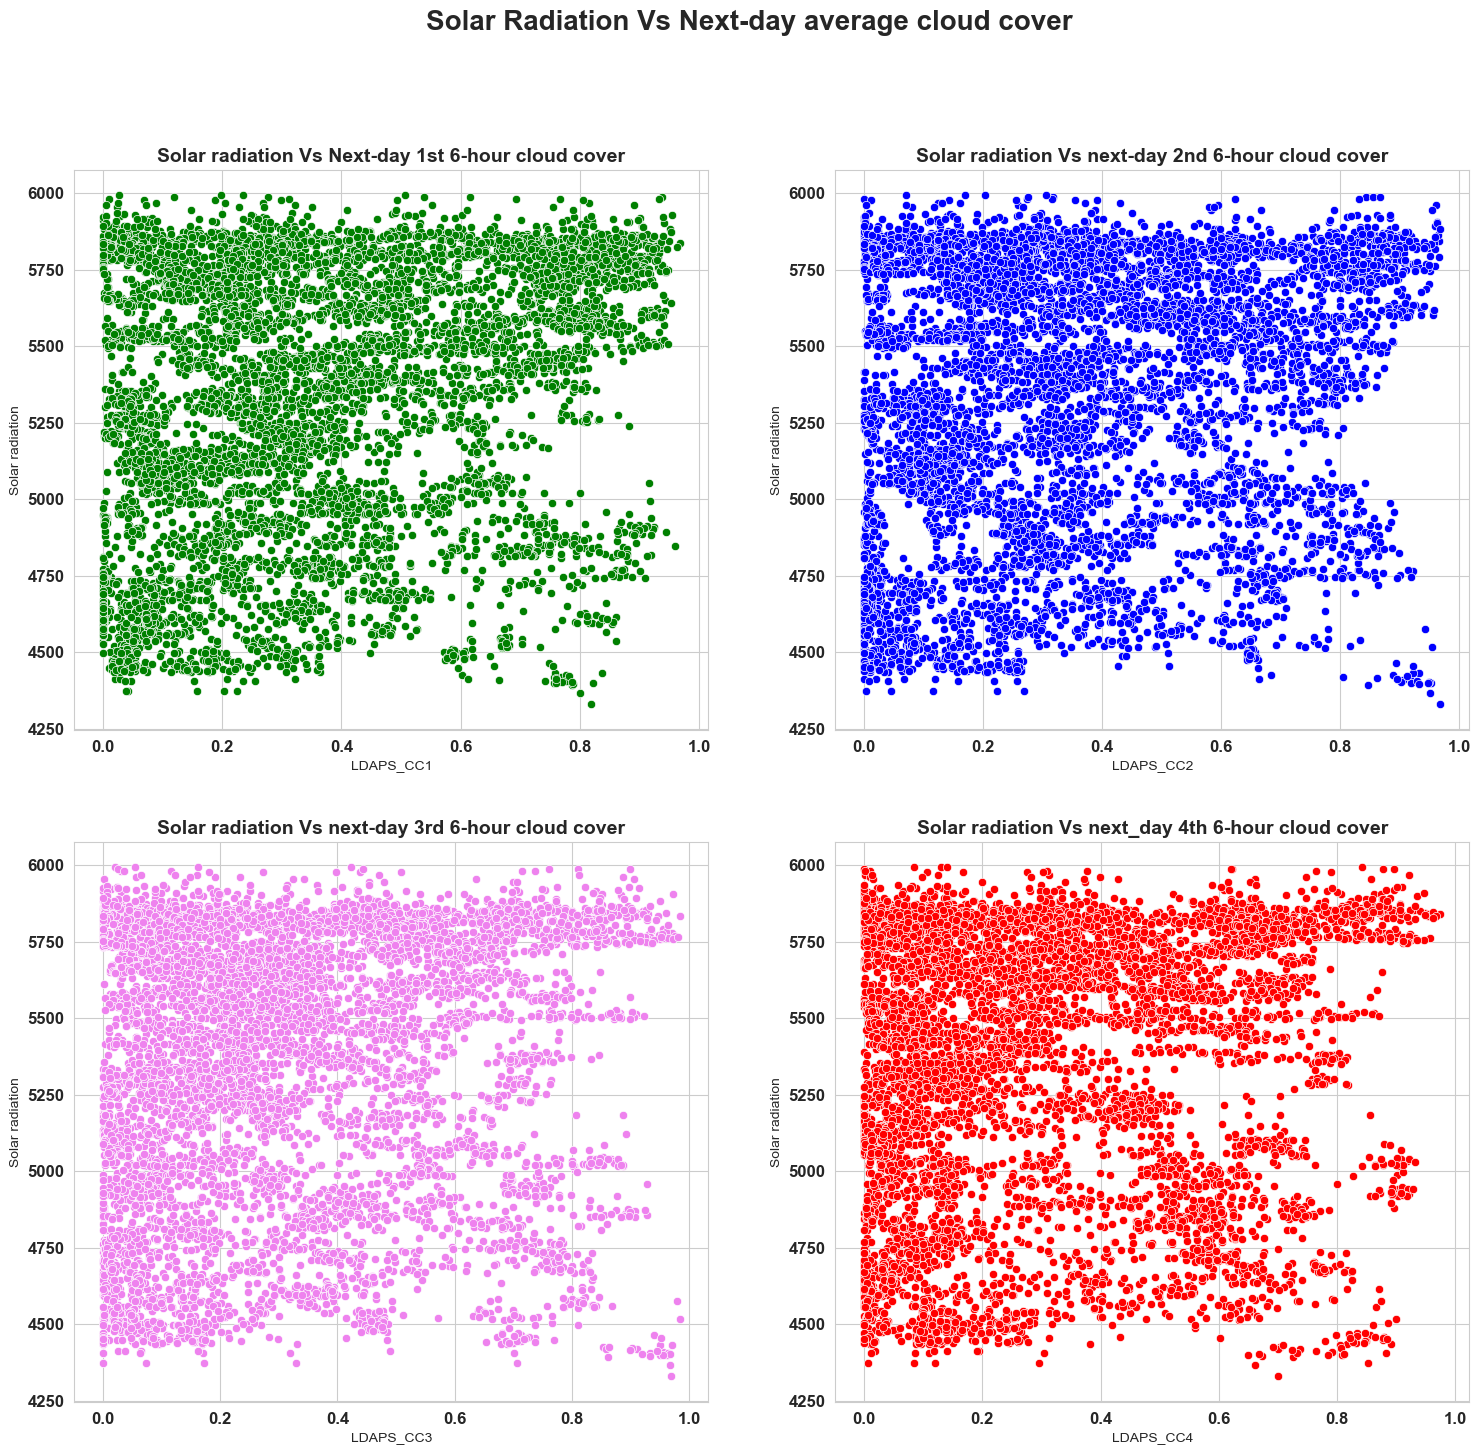

In [37]:
plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Solar radiation',data=tf_df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Solar radiation',data=tf_df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Solar radiation',data=tf_df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Solar radiation',data=tf_df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()


### Precipitation Vs Solar Radiation

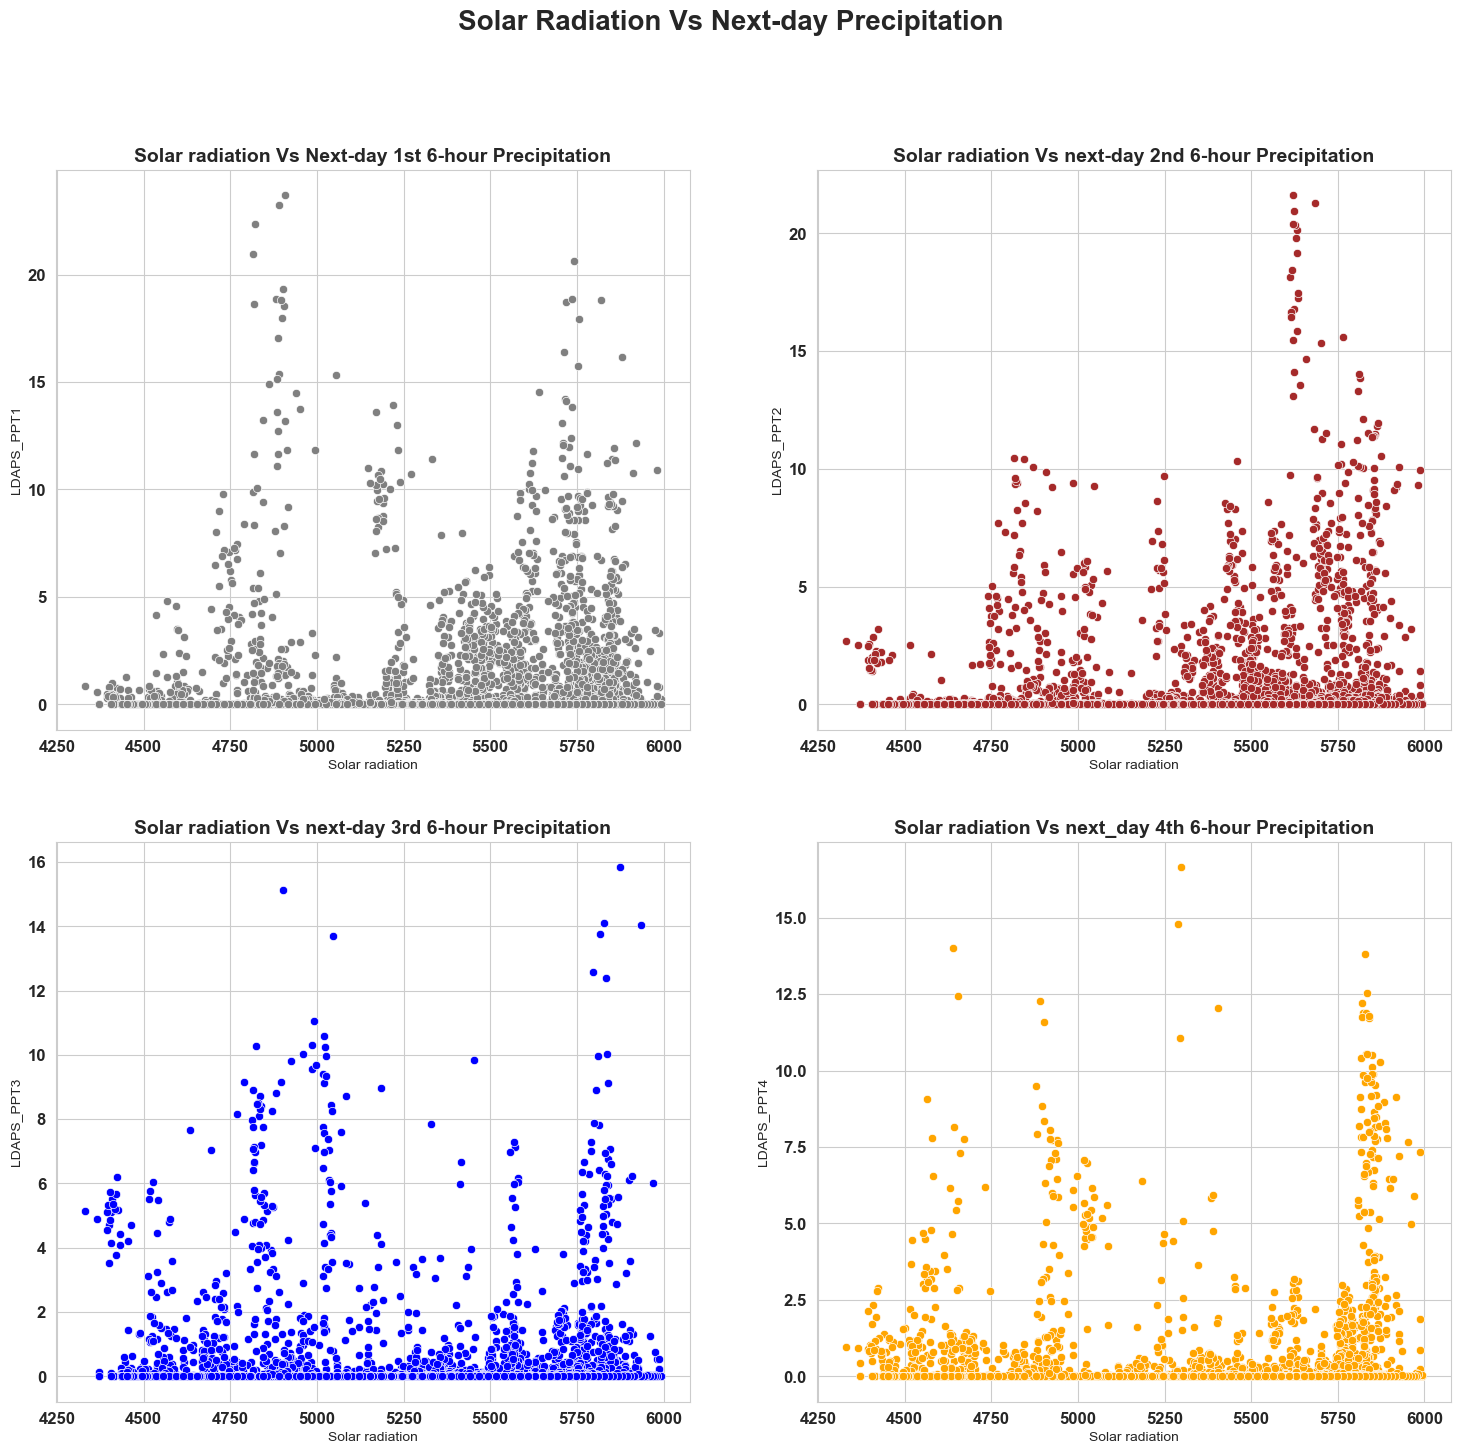

In [38]:
plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day Precipitation',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT1',x='Solar radiation',data=tf_df,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT2',x='Solar radiation',data=tf_df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT3',x='Solar radiation',data=tf_df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT4',x='Solar radiation',data=tf_df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

- Irrespective of to which 6 hr quarter reading belong, solar radiation value greater than 5500w/m2 leads to higher amount of precipitation (normally greater than 8).
- If we consider scatterplot of solar radiation vs cloud cover along with above scatter plot, we can draw inference that for higher value of solar radiation cloud cover and precipitation followed each other. In other words higher precipitation means higher cloud cover.

This all give rise to few questions here :
- Where relative humidity and wind speed fit in this equation of precipitation?
- Latent heat means heat absorption at constant temperature, there has to some effect of latent heat flux variation on relative humidity.
- Another interesting thing to look forward is wind tend to blow clound. What is wind speed value in relative terms when cloud cover is high?
- What is variation in precipitation,cloud cover and wind speed over year period?
- Variation of temperature over duration of one year period?

<Axes: xlabel='Month', ylabel='LDAPS_PPT1'>

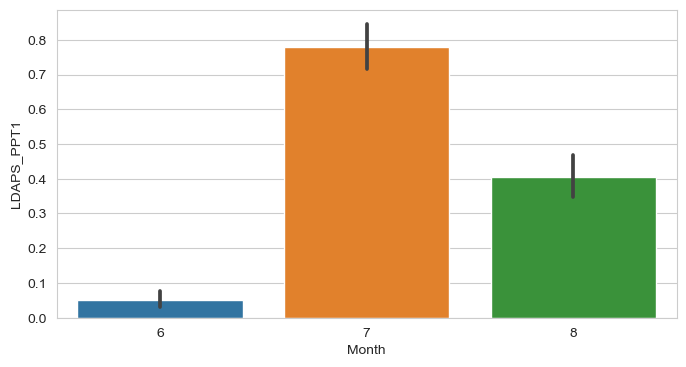

In [39]:
plt.figure(figsize=(8,4))
sns.barplot(x=tf_df['Month'], y=tf_df['LDAPS_PPT1'])

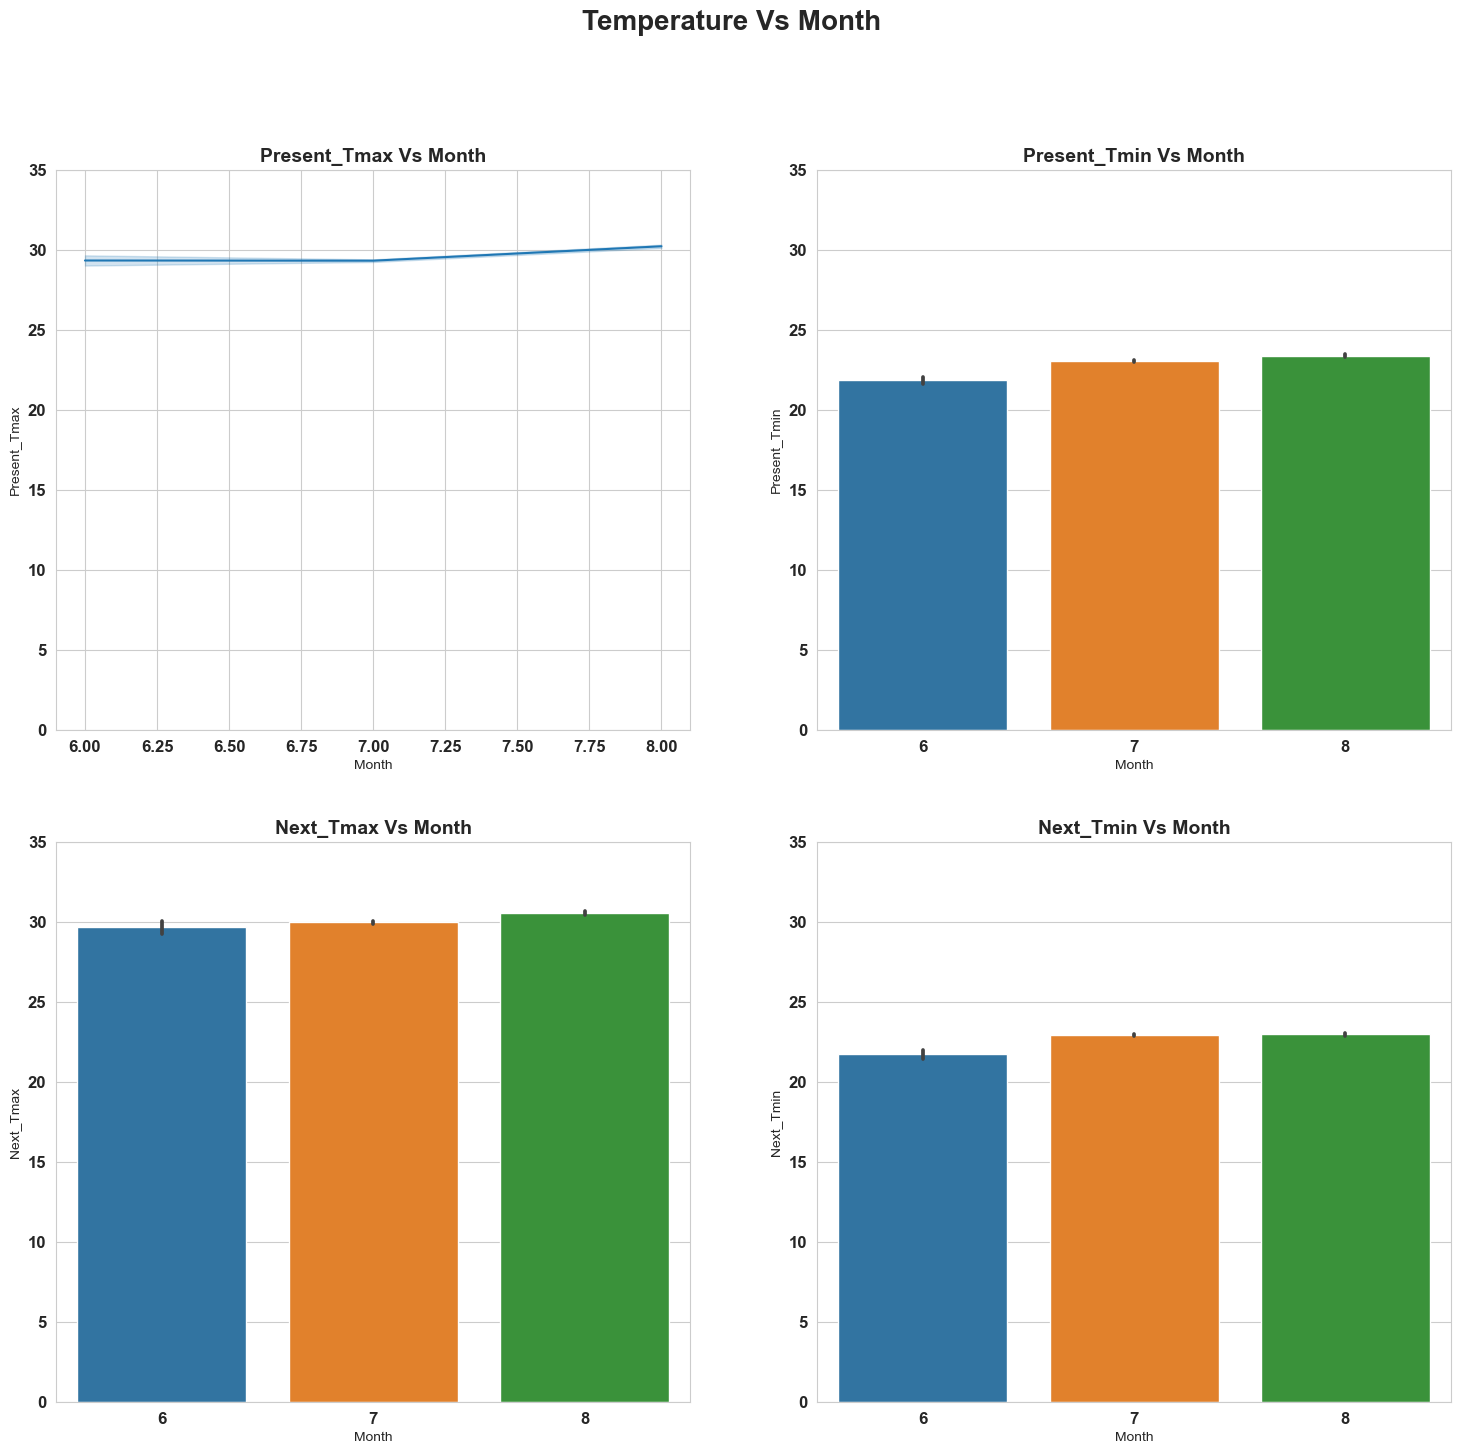

In [43]:
plt.figure(figsize=(18,16))
plt.suptitle('Temperature Vs Month',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Present_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.lineplot(y='Present_Tmax',x='Month',data=tf_df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Present_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Present_Tmin',x='Month',data=tf_df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmax',x='Month',data=tf_df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmin',x='Month',data=tf_df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

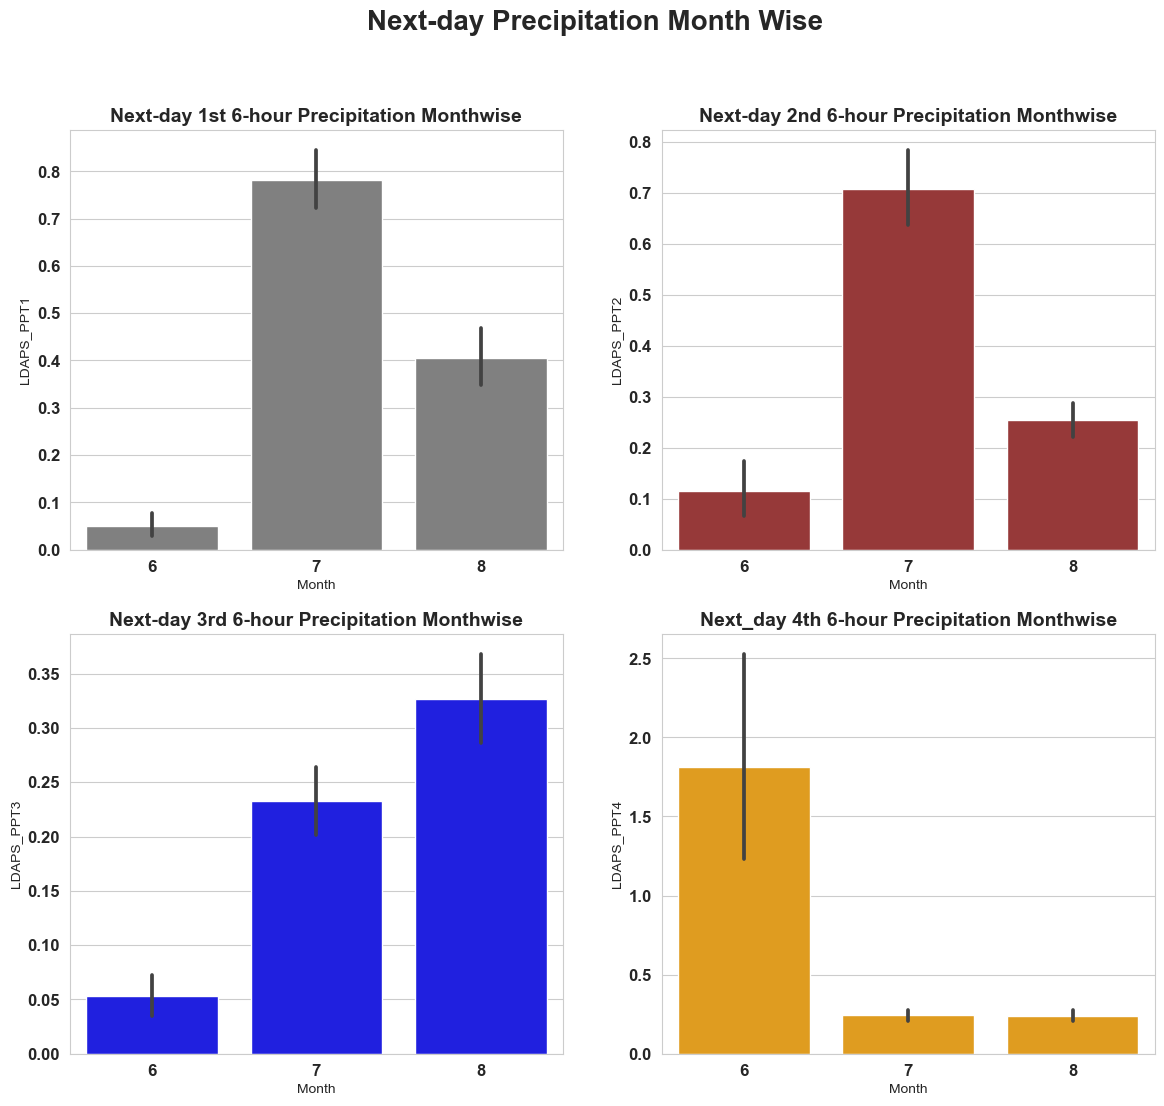

In [40]:
plt.figure(figsize=(14,12))
plt.suptitle('Next-day Precipitation Month Wise',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next-day 1st 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=tf_df['Month'], y=tf_df['LDAPS_PPT1'],data=tf_df,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next-day 2nd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=tf_df['Month'], y=tf_df['LDAPS_PPT2'],data=tf_df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next-day 3rd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=tf_df['Month'], y=tf_df['LDAPS_PPT3'],data=tf_df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_day 4th 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=tf_df['Month'], y=tf_df['LDAPS_PPT4'],data=tf_df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()


Minimum Solar radiation : 4329.520508
Maximum Solar radiation : 5992.895996
Average Solar radiation : 5343.724207856747


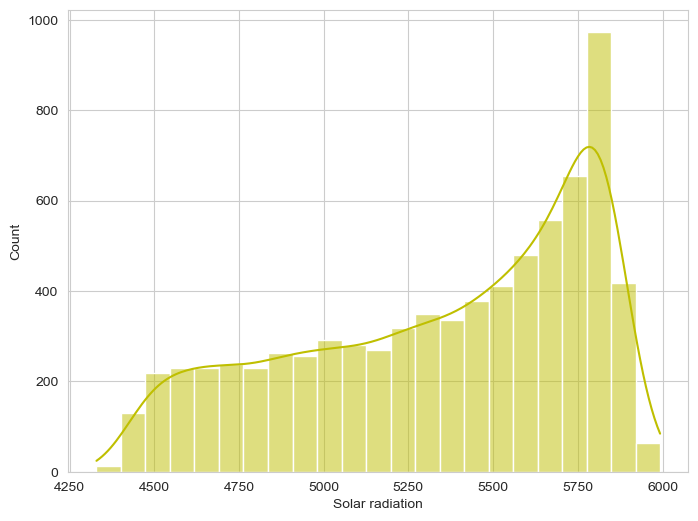

In [41]:
plt.figure(figsize=(8,6))
sns.histplot(tf_df['Solar radiation'],kde=True,color='y')
print('Minimum Solar radiation :',tf_df['Solar radiation'].min())
print('Maximum Solar radiation :',tf_df['Solar radiation'].max())
print('Average Solar radiation :',tf_df['Solar radiation'].mean())

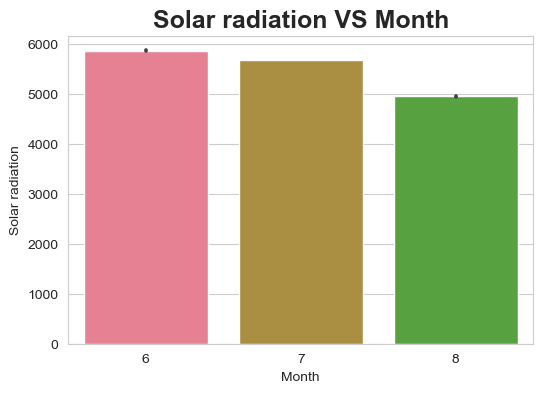

In [42]:
sns.set_palette('husl')
plt.figure(figsize=(6,4))
sns.barplot(y=tf_df['Solar radiation'], x=tf_df['Month'])
plt.title('Solar radiation VS Month',fontsize=18, fontweight='bold')
plt.show()

- Solar Radiation data is left skewed.
- It has its minimum value at 4329.52 Wh/m2 and maximum values at 5992.89 Wh/m2.
- For most of reading solar radiation values lies in the range 5600 to 5850.
- Minimum solar radiation occur in month of 8.

Minimum Wind Speed : 2.882579625 m/s
Maximum Wind Speed : 21.85762099 m/s
Average Wind Speed : 7.0940966991598575 m/s


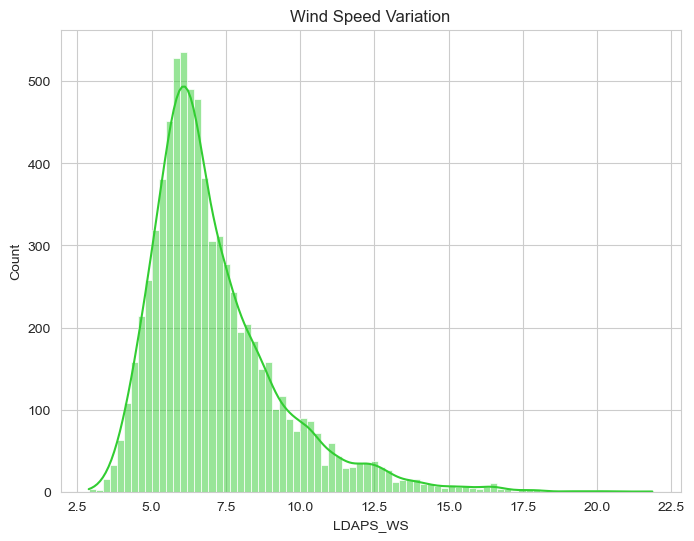

In [43]:
plt.figure(figsize=(8,6))
sns.histplot(tf_df['LDAPS_WS'],kde=True,color='limegreen')
plt.title('Wind Speed Variation')
print('Minimum Wind Speed :',tf_df['LDAPS_WS'].min(),'m/s')
print('Maximum Wind Speed :',tf_df['LDAPS_WS'].max(),'m/s')
print('Average Wind Speed :',tf_df['LDAPS_WS'].mean(),'m/s')

- It have its minimum value at 2.88m/s and maximum values at 21.85m/s
- For most of reading values lies in the rabge 5m/s to 8m/s
- Graph is slightly right skewed.

Minimum RHmax is 58.93628311 % and Maximum RHmax is 100.0001526 %
Minimum RHmin is 19.79466629 % and Maximum RHmin is 98.5247345 %


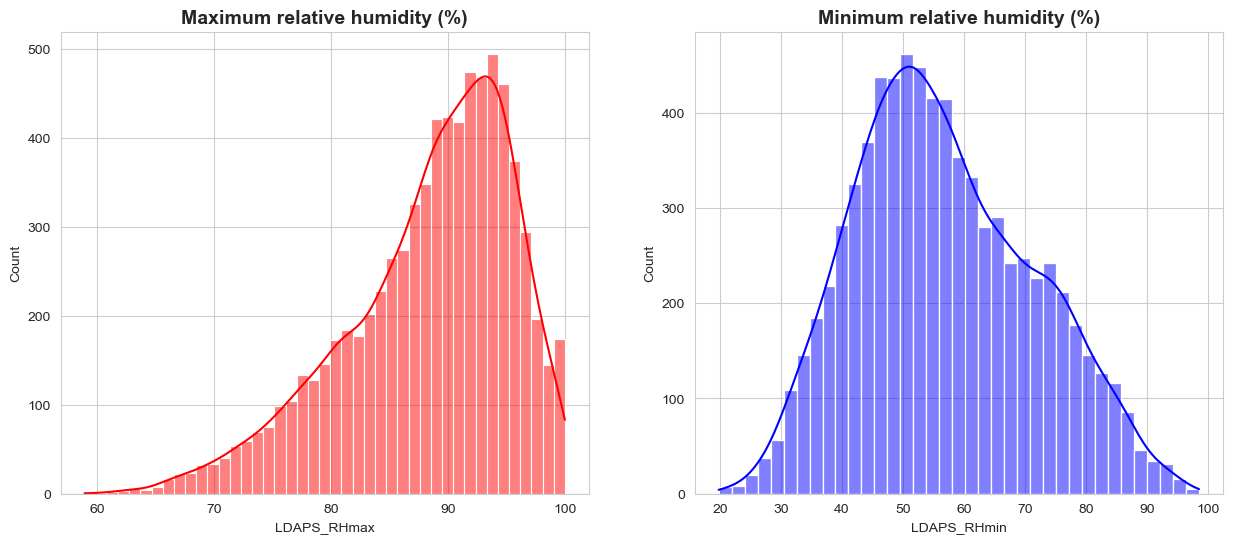

In [44]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(tf_df['LDAPS_RHmax'],kde=True,color='r')
plt.title('Maximum relative humidity (%)',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(tf_df['LDAPS_RHmin'],kde=True,color='b')
plt.title('Minimum relative humidity (%)',fontsize=14, fontweight='bold')
print('Minimum RHmax is {} % and Maximum RHmax is {} %'.format(tf_df['LDAPS_RHmax'].min(),tf_df['LDAPS_RHmax'].max()))
print('Minimum RHmin is {} % and Maximum RHmin is {} %'.format(tf_df['LDAPS_RHmin'].min(),tf_df['LDAPS_RHmin'].max()))

- Data of Maximum Relative humidity is left skewed and Data of Minimum Relative humidity is slightly right skewed.
- Maximum Relative humidity for most of the days lie in the range 90 to 97
- Maximum Relative humidity lies in the range 45 to 62.

Minimum Tmax applied lapse rate is 17.62495378 (Â°C) and Maximum Tmax applied lapse rate is 38.54225522 (Â°C)
Minimum Tmin is applied lapse rate 14.27264631 (Â°C) and Maximum Tmin applied lapse rate is 29.61934244 (Â°C)


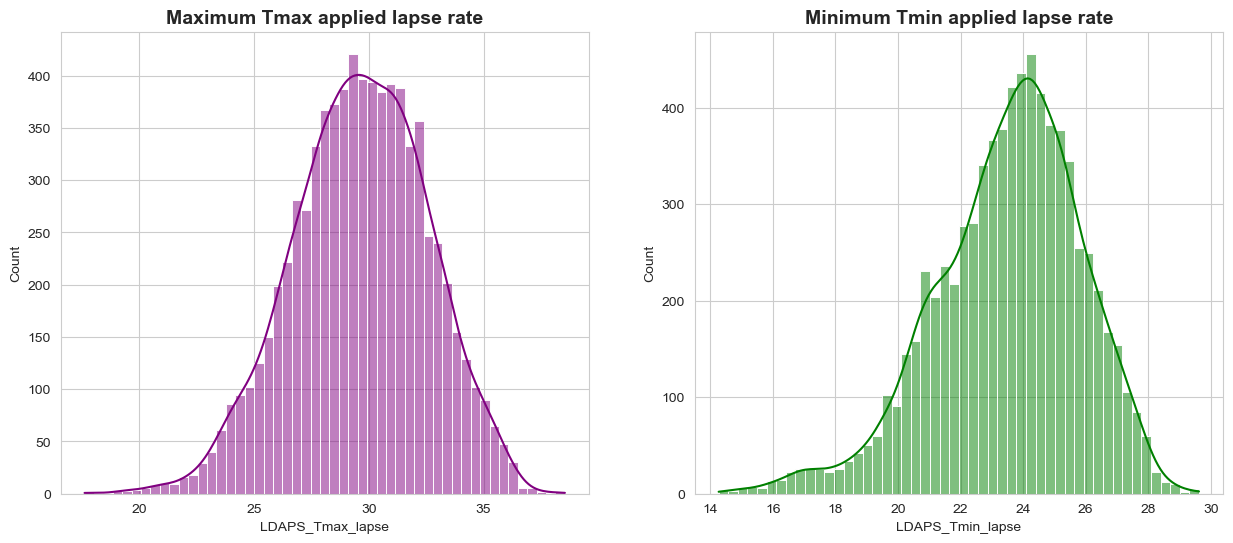

In [45]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(tf_df['LDAPS_Tmax_lapse'],kde=True,color='purple')
plt.title('Maximum Tmax applied lapse rate',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(tf_df['LDAPS_Tmin_lapse'],kde=True,color='green')
plt.title('Minimum Tmin applied lapse rate',fontsize=14, fontweight='bold')
print('Minimum Tmax applied lapse rate is {} (Â°C) and Maximum Tmax applied lapse rate is {} (Â°C)'.format(tf_df['LDAPS_Tmax_lapse'].min(),tf_df['LDAPS_Tmax_lapse'].max()))
print('Minimum Tmin is applied lapse rate {} (Â°C) and Maximum Tmin applied lapse rate is {} (Â°C)'.format(tf_df['LDAPS_Tmin_lapse'].min(),tf_df['LDAPS_Tmin_lapse'].max()))

- Tmax and Tmin for applied lapse rate are almost normally distributed.
- Tmax_lapse for majority of days its values lies in the range 27 to 33 (Â°C).
- Tmin_lapse for majority of days its values lies in the range 23 to 26 (Â°C).

Minimum Latent Heat Flux : -13.60321209
Maximum Latent Heat Flux : 213.4140062
Average Latent Heat Flux : 62.492606287988


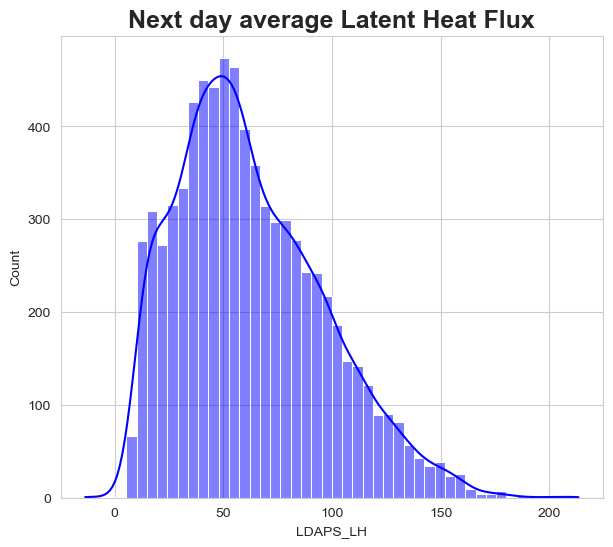

In [46]:
plt.figure(figsize=(7,6))
sns.histplot(tf_df['LDAPS_LH'],kde=True,color='blue')
plt.title('Next day average Latent Heat Flux',fontsize=18, fontweight='bold')
print('Minimum Latent Heat Flux :',tf_df['LDAPS_LH'].min())
print('Maximum Latent Heat Flux :',tf_df['LDAPS_LH'].max())
print('Average Latent Heat Flux :',tf_df['LDAPS_LH'].mean())

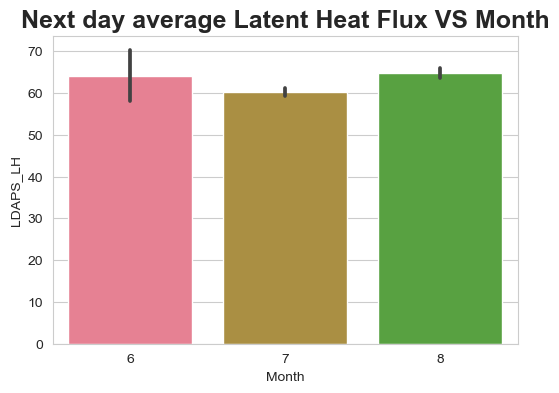

In [47]:
plt.figure(figsize=(6,4))
sns.barplot(y=tf_df['LDAPS_LH'], x=tf_df['Month'])
plt.title('Next day average Latent Heat Flux VS Month',fontsize=18, fontweight='bold')
plt.show()

### Encoding Categorical Data

In [48]:
tf_df.columns.to_series().groupby(tf_df.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], datetime64[ns]: ['Date'], int64: ['Day', 'Month', 'Year'], object: ['State', 'City']}

In [49]:
Category = ['State', 'City']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    tf_df[i] = le.fit_transform(tf_df[i])
tf_df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  State  City  
0       21.2   30      6  2013      1     6  
1       22.5   30      6  2013      1     6  
2       23.9   30      6  2013      1     6  
3       24.3   30      6  2013      1     6  
4       22.5   30      6  2013      0     3

In [50]:
tf_df.drop(['Date'], axis=1, inplace=True)

##  Feature Selection and Engineering

### 1. Outliers Detection and Removal

In [51]:
tf_df.shape

(7588, 29)

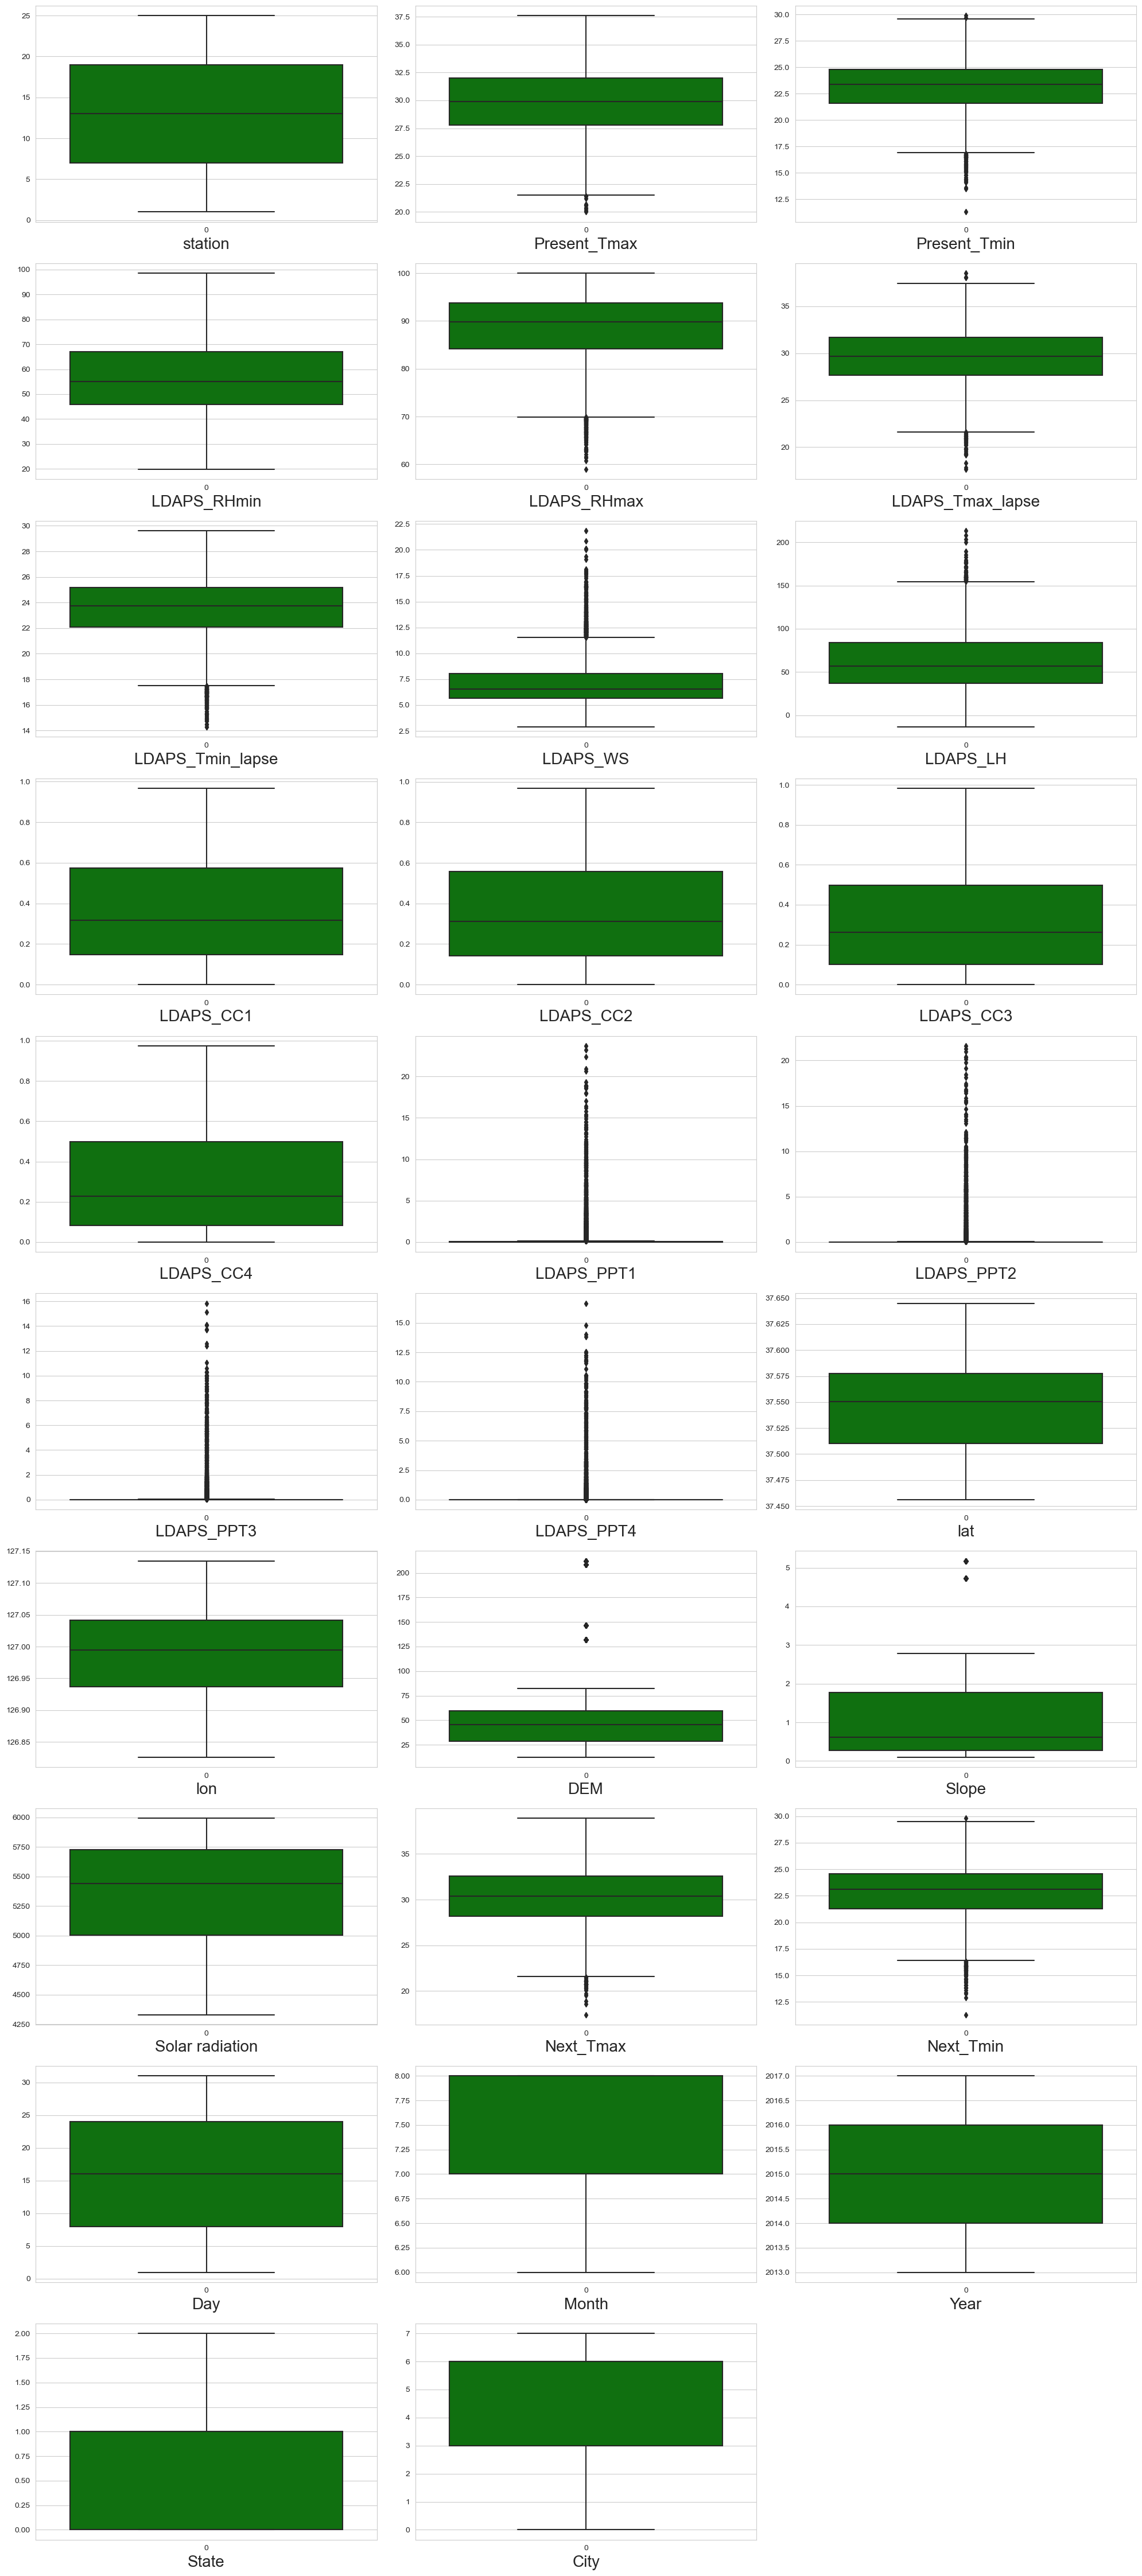

In [52]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in tf_df:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(tf_df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

### Outliers removal using Zscore method

In [53]:
from scipy.stats import zscore
z = np.abs(zscore(tf_df))
threshold = 3
tf_df1 = tf_df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", tf_df.shape)
print ("Shape of the dataframe after removing outliers: ", tf_df1.shape)
print ("Percentage of data loss post outlier removal: ", (tf_df.shape[0]-tf_df1.shape[0])/tf_df.shape[0]*100)

tf_df=tf_df1.copy()

Shape of the dataframe before removing outliers:  (7588, 29)
Shape of the dataframe after removing outliers:  (6739, 29)
Percentage of data loss post outlier removal:  11.188719030047443


We are losing 11.18 % of data. Its big but we can afford it. Considering we have a lot of rows in our datatset for ML model building.

### 2. Skewness of Features

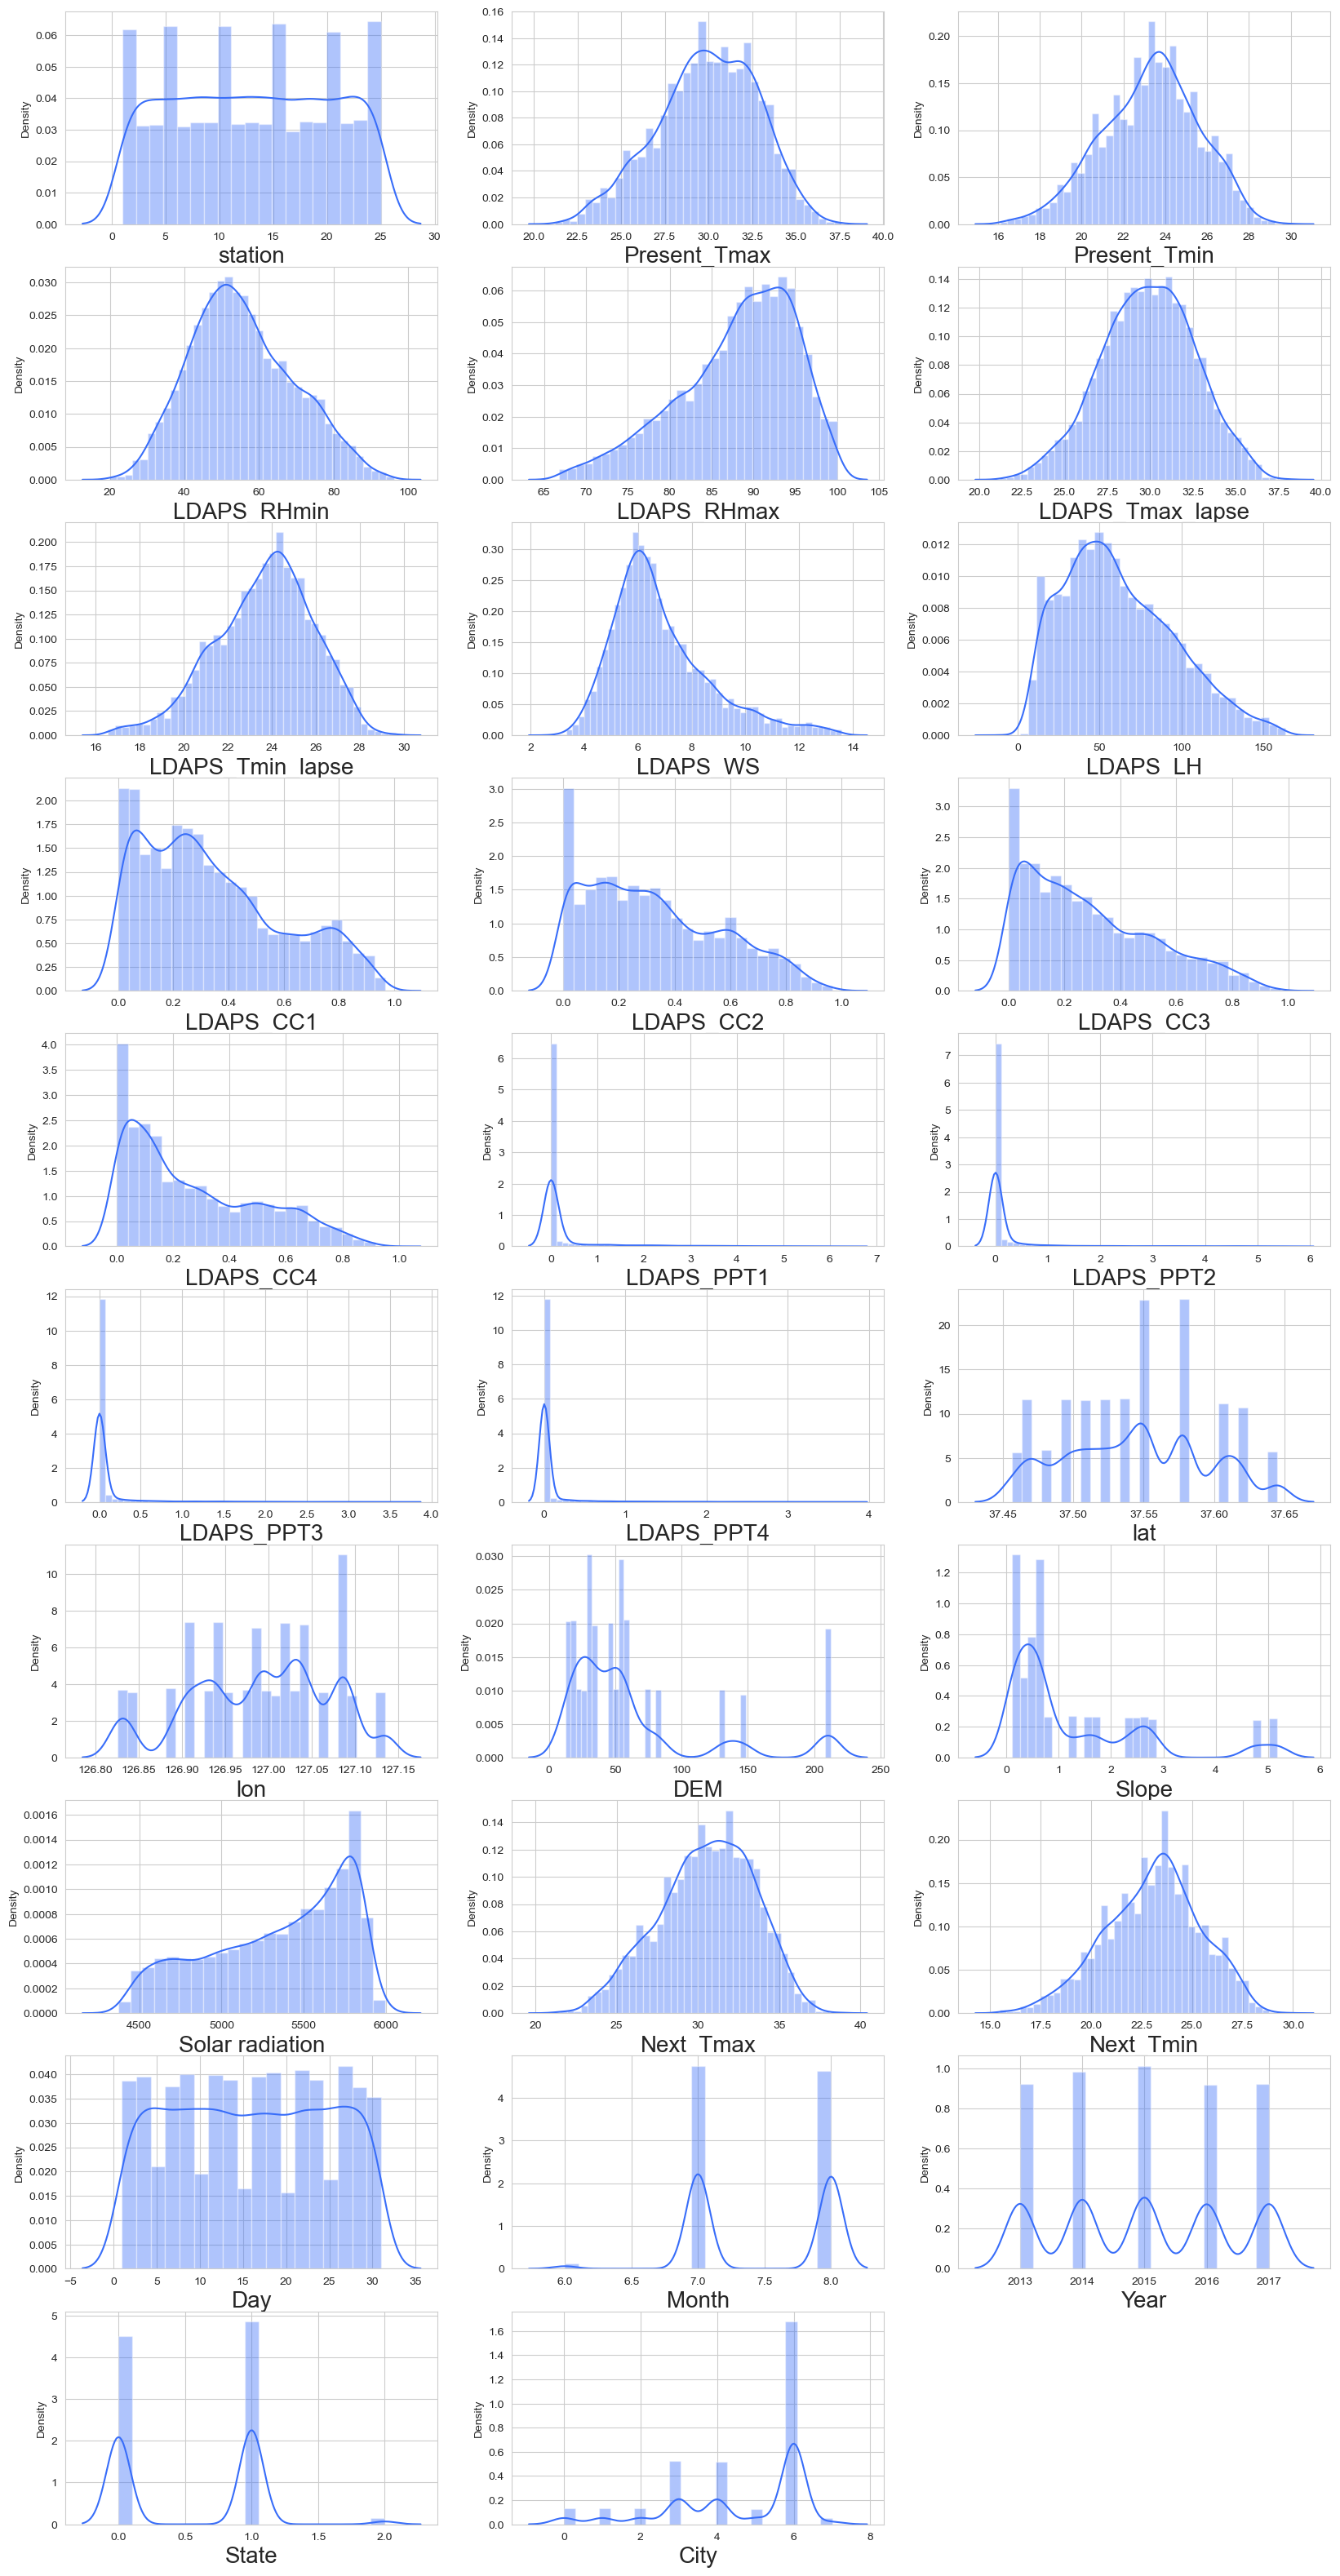

In [54]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in tf_df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(tf_df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Skewness is important feature for continous data. There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.

In [55]:
tf_df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.000057
Month              -0.168571
Year                0.025066
State               0.143188
City               -0.951530
dtype: float64

In [57]:
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
tf_df[skew] = scaler.fit_transform(tf_df[skew].values)

For LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3 and LDAPS_PPT4 skewness has not been removed but it got reduced

### 3. Corrleation

In [58]:
tf_df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110291      0.133638    -0.069582   
Present_Tmax      0.110291      1.000000      0.610428    -0.154266   
Present_Tmin      0.133638      0.610428      1.000000     0.151385   
LDAPS_RHmin      -0.069582     -0.154266      0.151385     1.000000   
LDAPS_RHmax      -0.183451     -0.322779     -0.055235     0.566764   
LDAPS_Tmax_lapse  0.066863      0.540680      0.441577    -0.555583   
LDAPS_Tmin_lapse  0.109033      0.623808      0.763639     0.112428   
LDAPS_WS          0.030524     -0.069713      0.035152     0.168404   
LDAPS_LH         -0.135723      0.119218     -0.008495    -0.002906   
LDAPS_CC1         0.008671     -0.290078      0.090828     0.574389   
LDAPS_CC2         0.006380     -0.157917      0.117894     0.713238   
LDAPS_CC3         0.006098     -0.061485      0.044153     0.632481   
LDAPS_CC4         0.011574     -0.050202      0.001344     0.458457   
LDAPS_PPT1       -0.002447     -0.202304      0.072693     0.425870   
LDAPS_PPT2       -0.008259     -0.105340      0.104421     0.522672   
LDAPS_PPT3       -0.015657     -0.042731      0.029559     0.439268   
LDAPS_PPT4       -0.000449     -0.031619     -0.063746     0.267687   
lat              -0.241811     -0.052041     -0.072707     0.090054   
lon              -0.122829      0.011132     -0.043201    -0.093969   
DEM              -0.327126     -0.130146     -0.238472     0.056561   
Slope            -0.149577     -0.090758     -0.161118     0.074057   
Solar radiation  -0.035845     -0.113658     -0.072920     0.218884   
Next_Tmax         0.106378      0.586943      0.438813    -0.433872   
Next_Tmin         0.129110      0.615950      0.785946     0.134518   
Day               0.005032     -0.130708     -0.082712    -0.073118   
Month             0.011283      0.172255      0.103946    -0.185296   
Year              0.006658      0.099185      0.099222     0.001709   
State            -0.107709     -0.049572     -0.073556    -0.078498   
City             -0.172313     -0.028619     -0.032508    -0.060087   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.183451          0.066863          0.109033  0.030524   
Present_Tmax        -0.322779          0.540680          0.623808 -0.069713   
Present_Tmin        -0.055235          0.441577          0.763639  0.035152   
LDAPS_RHmin          0.566764         -0.555583          0.112428  0.168404   
LDAPS_RHmax          1.000000         -0.404961         -0.186415  0.061239   
LDAPS_Tmax_lapse    -0.404961          1.000000          0.624720 -0.150617   
LDAPS_Tmin_lapse    -0.186415          0.624720          1.000000  0.000407   
LDAPS_WS             0.061239         -0.150617          0.000407  1.000000   
LDAPS_LH             0.282556          0.006333         -0.143326 -0.056712   
LDAPS_CC1            0.427048         -0.416255          0.021658  0.200101   
LDAPS_CC2            0.372434         -0.492392          0.086212  0.152994   
LDAPS_CC3            0.139771         -0.462439          0.033526  0.058573   
LDAPS_CC4            0.046726         -0.362521         -0.015241  0.085162   
LDAPS_PPT1           0.418040         -0.315822         -0.039343  0.201696   
LDAPS_PPT2           0.397902         -0.363531          0.021753  0.173840   
LDAPS_PPT3           0.244110         -0.314765         -0.018281  0.096427   
LDAPS_PPT4           0.104459         -0.226345         -0.084978  0.151107   
lat                  0.238703         -0.038285         -0.091834 -0.028068   
lon                  0.012312          0.106354         -0.025146 -0.077715   
DEM                  0.175987         -0.109077         -0.174616  0.112368   
Slope                0.202087         -0.094371         -0.154325  0.091920   
Solar radiation      0.150918         -0.052156         -0.020302  0.169197   
Next_Tmax           -0.325671          0.816861          0.551094 -0.20

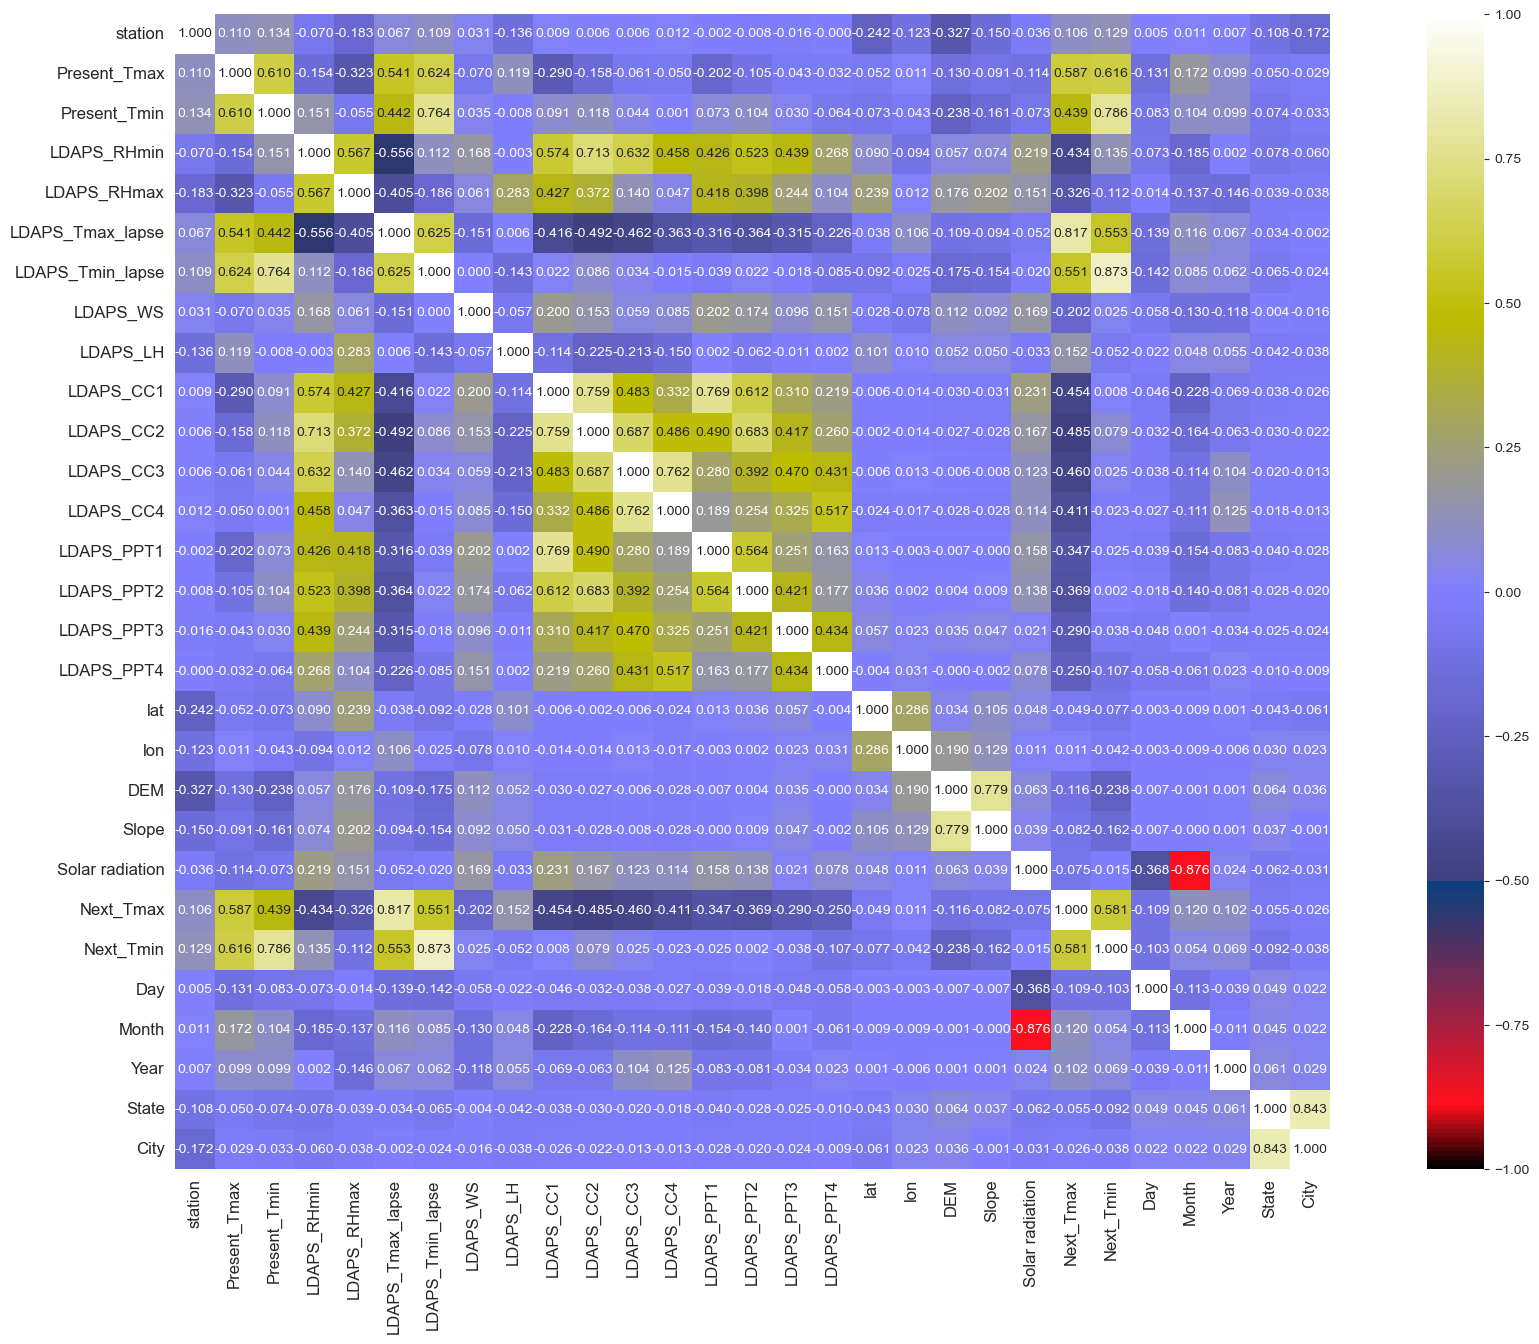

In [59]:
plt.figure(figsize=(25,15))
sns.heatmap(tf_df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

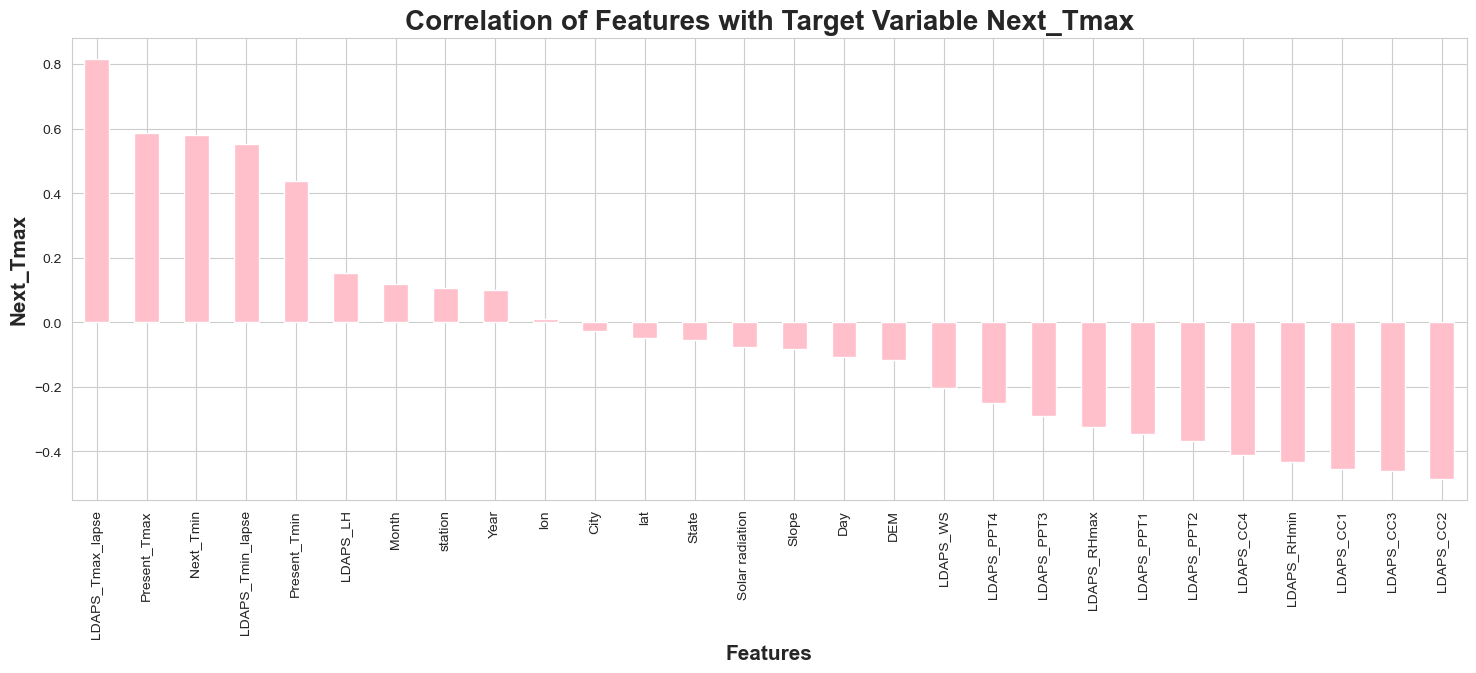

In [60]:
plt.figure(figsize = (18,6))
tf_df.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending=False).plot(kind='bar',color = 'pink')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmax',fontsize=15,fontweight='bold')
plt.title('Correlation of Features with Target Variable Next_Tmax',fontsize = 20,fontweight='bold')
plt.show()

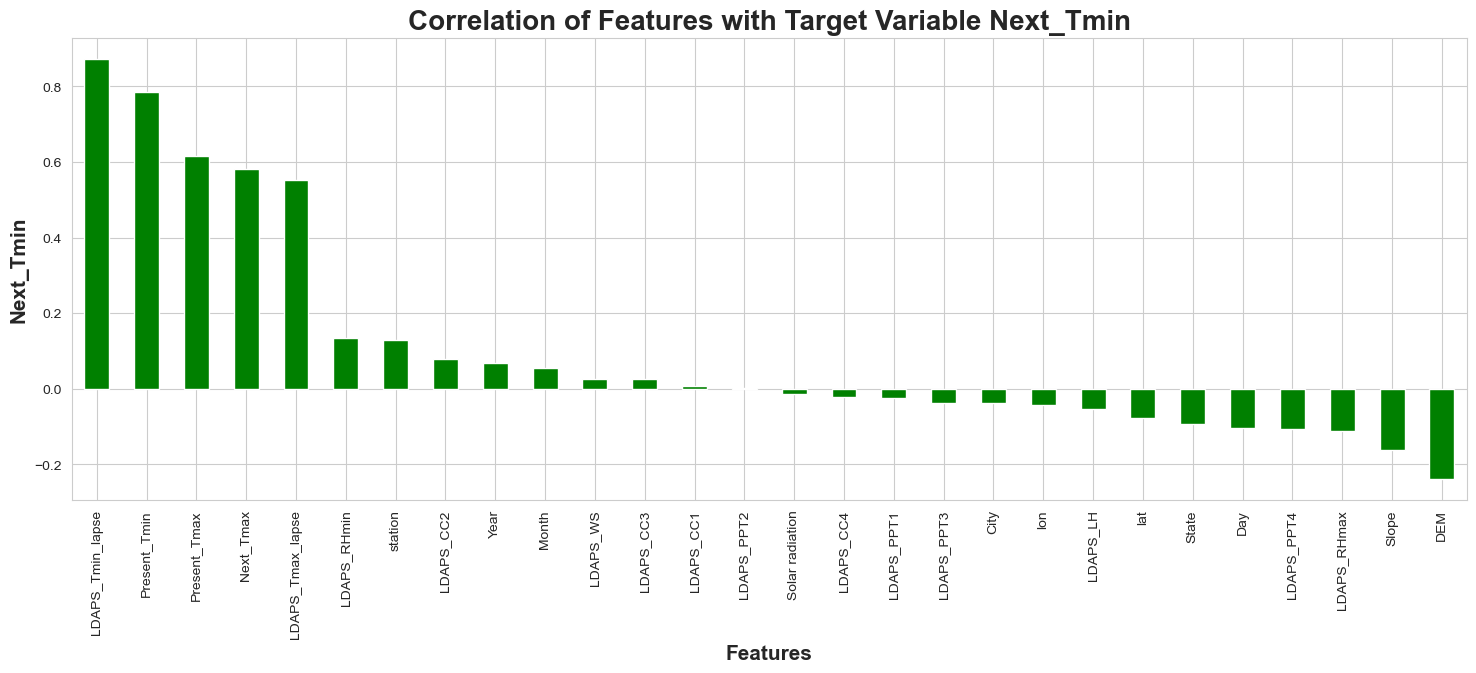

In [61]:
plt.figure(figsize = (18,6))
tf_df.corr()['Next_Tmin'].drop(['Next_Tmin']).sort_values(ascending=False).plot(kind='bar',color = 'green')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmin',fontsize=15,fontweight='bold')
plt.title('Correlation of Features with Target Variable Next_Tmin',fontsize = 20,fontweight='bold')
plt.show()

## Machine Learning Model Building For Next_Tmax

### Standard Scaling

In [62]:
X = tf_df.drop(['Next_Tmax'], axis =1)
Y = tf_df['Next_Tmax']

In [63]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

### Checking Multicollinearity between features using variance_inflation_factor

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values          Features
0     1.368022           station
1     2.831262      Present_Tmax
2     3.368440      Present_Tmin
3     6.026780       LDAPS_RHmin
4     2.621880       LDAPS_RHmax
5     6.516962  LDAPS_Tmax_lapse
6     8.184609  LDAPS_Tmin_lapse
7     1.239548          LDAPS_WS
8     1.510221          LDAPS_LH
9     5.467355         LDAPS_CC1
10    5.554302         LDAPS_CC2
11    4.388737         LDAPS_CC3
12    2.806472         LDAPS_CC4
13    3.030216        LDAPS_PPT1
14    2.426274        LDAPS_PPT2
15    1.652341        LDAPS_PPT3
16    1.659025        LDAPS_PPT4
17    1.719320               lat
18    1.307019               lon
19    4.773843               DEM
20    3.064600             Slope
21  165.397502   Solar radiation
22    5.608202         Next_Tmin
23   38.124359               Day
24  143.350557             Month
25    1.141231              Year
26    3.617092             State
27    3.642472              City

###  PCA

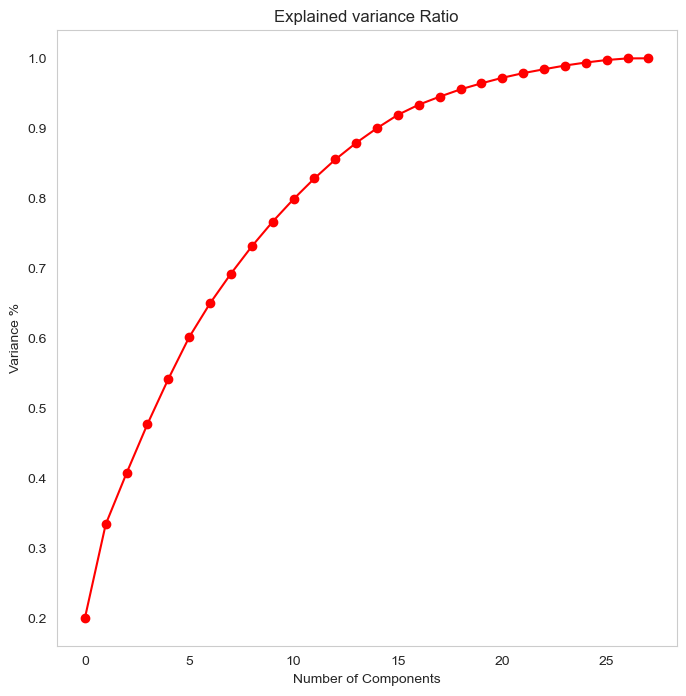

In [65]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

AS per the graph, we can see that 15 principal components attribute for 90% of variation in the data. We shall pick the first 15 components for our prediction.

In [66]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_scale)

In [67]:
principle_x=pd.DataFrame(x_new,columns=np.arange(15))

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 15)
Training target vector size: (4515,)
Test feature matrix size: (2224, 15)
Test target vector size: (2224,)


### Finding Best Random State

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8032235500133411 on Random_state 108


### Linear Regression Base Model

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=108, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [31.97768522 29.98434751 29.44405714 ... 25.59511297 25.11773804
 32.61729859]


Actual Wins:
 934     32.0
4582    30.1
7277    27.8
4776    27.6
3755    29.8
        ... 
7096    36.7
7148    35.4
7667    28.4
5063    24.0
4239    32.6
Name: Next_Tmax, Length: 2224, dtype: float64


In [72]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 1.0063606336765452
Mean squared error : 1.733495161225572
Root Mean Squared Error: 1.3166226343282923


 R2 Score :
0.8032235500133411


In [73]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.6633295574041903


### Applying Other ML Models

In [74]:
from sklearn.ensemble import BaggingRegressor

In [75]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.7076794064748204
Mean squared error : 0.8817216803057558
Root Mean Squared Error: 0.9390003622500663


 R2 Score :
0.8999120009056308


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.6073574640287771
Mean squared error : 0.6509117333633098
Root Mean Squared Error: 0.8067910097189419


 R2 Score :
0.9261122251674818


 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.0617356115107914
Mean squared error : 2.1122257194244605
Root Mean Squared Error: 1.4533498269255274


 R2 Score :
0.7602322245047345


 Error of  AdaBoostRegressor() :
Mean absolute error : 1.141771474291546
Mean squared error : 1.9663872894033934
Root Mean Squared Error: 1.4022793193238619


 R2 Score :
0.7767869684538808


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.8351030120999707
Mean squared error : 1.1521199980169616
Root Mean Squared Error: 1.0733685285198935


 R2 Score :
0.8692179313565944


 Error of  XGBRe

In [76]:
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.6841741185761847


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.6922937109202842


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.40312798312988224


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.6478922855486378


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.7060162773631212


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, ma

## Hyper Parameter Tuning: GridSearchCV

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
parameter = {'n_estimators':[200,400,500,600],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [80]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)

In [ ]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 1/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.211 total time=   0.6s
[CV 2/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 2/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.227 total time=   0.6s
[CV 3/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 3/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.215 total time=   0.7s
[CV 4/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 4/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.235 total time=   0.7s
[CV 5/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[C

[CV 5/5; 8/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=6, n_estimators=600;, score=0.545 total time=   5.6s
[CV 1/5; 9/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200
[CV 1/5; 9/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200;, score=0.245 total time=   4.6s
[CV 2/5; 9/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200
[CV 2/5; 9/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200;, score=0.256 total time=   4.3s
[CV 3/5; 9/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200
[CV 3/5; 9/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200;, score=0.242 total time=   4.4s
[CV 4/5; 9/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200
[CV 4/5; 9/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200;, score=0.263 total time=   4.4s
[CV 5/5; 9/288] START booster=gbtre

[CV 4/5; 16/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=10, n_estimators=600;, score=0.579 total time=  25.8s
[CV 5/5; 16/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=10, n_estimators=600
[CV 5/5; 16/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=10, n_estimators=600;, score=0.573 total time=  25.7s
[CV 1/5; 17/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=4, n_estimators=200
[CV 1/5; 17/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=4, n_estimators=200;, score=0.211 total time=   0.8s
[CV 2/5; 17/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=4, n_estimators=200
[CV 2/5; 17/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=4, n_estimators=200;, score=0.227 total time=   0.8s
[CV 3/5; 17/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=4, n_estimators=200
[CV 3/5; 17/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=4, n_estimators=200;, score=0.215 total time=   0.8s
[CV 4/5; 17/288] START 

[CV 3/5; 24/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=600;, score=0.531 total time=   5.8s
[CV 4/5; 24/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=600
[CV 4/5; 24/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=600;, score=0.556 total time=   6.5s
[CV 5/5; 24/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=600
[CV 5/5; 24/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=600;, score=0.545 total time=   5.9s
[CV 1/5; 25/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=8, n_estimators=200
[CV 1/5; 25/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=8, n_estimators=200;, score=0.245 total time=   4.2s
[CV 2/5; 25/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=8, n_estimators=200
[CV 2/5; 25/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=8, n_estimators=200;, score=0.256 total time=   4.4s
[CV 3/5; 25/288] START boo

[CV 2/5; 32/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600;, score=0.572 total time=  27.8s
[CV 3/5; 32/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600
[CV 3/5; 32/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600;, score=0.567 total time=  27.4s
[CV 4/5; 32/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600
[CV 4/5; 32/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600;, score=0.579 total time=  26.5s
[CV 5/5; 32/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600
[CV 5/5; 32/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600;, score=0.574 total time=  26.0s
[CV 1/5; 33/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200
[CV 1/5; 33/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200;, score=0.764 total time=   0.4s
[CV 2/5; 33/288] STAR

[CV 1/5; 40/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600;, score=0.895 total time=   5.6s
[CV 2/5; 40/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600
[CV 2/5; 40/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600;, score=0.887 total time=   6.1s
[CV 3/5; 40/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600
[CV 3/5; 40/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600;, score=0.897 total time=   5.5s
[CV 4/5; 40/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600
[CV 4/5; 40/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600;, score=0.897 total time=   5.6s
[CV 5/5; 40/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600
[CV 5/5; 40/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600;, score=0.899 total time=   5.9s
[CV 1/5; 41/288] START booster=gbtr

[CV 5/5; 47/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=500;, score=0.893 total time=  24.4s
[CV 1/5; 48/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600
[CV 1/5; 48/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600;, score=0.897 total time=  28.9s
[CV 2/5; 48/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600
[CV 2/5; 48/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600;, score=0.893 total time=  28.7s
[CV 3/5; 48/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600
[CV 3/5; 48/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600;, score=0.896 total time=  28.2s
[CV 4/5; 48/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600
[CV 4/5; 48/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600;, score=0.893 total time=  28.2s
[CV 5/5; 48/288] START boo

[CV 4/5; 55/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500;, score=0.891 total time=   5.0s
[CV 5/5; 55/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500
[CV 5/5; 55/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500;, score=0.892 total time=   4.7s
[CV 1/5; 56/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=600
[CV 1/5; 56/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=600;, score=0.895 total time=   5.8s
[CV 2/5; 56/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=600
[CV 2/5; 56/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=600;, score=0.887 total time=   5.5s
[CV 3/5; 56/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=600
[CV 3/5; 56/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=600;, score=0.897 total time=   5.5s
[CV 4/5; 56/288] START booster=gbtr

[CV 3/5; 63/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500;, score=0.896 total time=  20.0s
[CV 4/5; 63/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500
[CV 4/5; 63/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500;, score=0.891 total time=  20.0s
[CV 5/5; 63/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500
[CV 5/5; 63/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500;, score=0.894 total time=  19.5s
[CV 1/5; 64/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=600
[CV 1/5; 64/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=600;, score=0.898 total time=  21.8s
[CV 2/5; 64/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=600
[CV 2/5; 64/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=600;, score=0.892 total time=  22.2s
[CV 3/5; 64/288] START boo

[CV 3/5; 71/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500;, score=0.921 total time=   4.2s
[CV 4/5; 71/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500
[CV 4/5; 71/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500;, score=0.923 total time=   4.2s
[CV 5/5; 71/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500
[CV 5/5; 71/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500;, score=0.917 total time=   4.1s
[CV 1/5; 72/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=600
[CV 1/5; 72/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=600;, score=0.924 total time=   5.0s
[CV 2/5; 72/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=600
[CV 2/5; 72/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=600;, score=0.911 total time=   5.0s
[CV 3/5; 72/288] START booster=gbtree, eta=0

[CV 3/5; 79/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500;, score=0.897 total time=  12.2s
[CV 4/5; 79/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500
[CV 4/5; 79/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500;, score=0.897 total time=  11.6s
[CV 5/5; 79/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500
[CV 5/5; 79/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500;, score=0.900 total time=  11.3s
[CV 1/5; 80/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=600
[CV 1/5; 80/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=600;, score=0.899 total time=  12.0s
[CV 2/5; 80/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=600
[CV 2/5; 80/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=600;, score=0.894 total time=  12.9s
[CV 3/5; 80/288] START booster=gbtr

[CV 3/5; 87/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500;, score=0.913 total time=   1.7s
[CV 4/5; 87/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500
[CV 4/5; 87/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500;, score=0.917 total time=   1.8s
[CV 5/5; 87/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500
[CV 5/5; 87/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500;, score=0.915 total time=   2.0s
[CV 1/5; 88/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=600
[CV 1/5; 88/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=600;, score=0.917 total time=   1.9s
[CV 2/5; 88/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=600
[CV 2/5; 88/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=600;, score=0.906 total time=   1.8s
[CV 3/5; 88/288] START booster=gbtree, eta=0

[CV 3/5; 95/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500;, score=0.897 total time=   2.8s
[CV 4/5; 95/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500
[CV 4/5; 95/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500;, score=0.896 total time=   2.8s
[CV 5/5; 95/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500
[CV 5/5; 95/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500;, score=0.897 total time=   2.7s
[CV 1/5; 96/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=600
[CV 1/5; 96/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=600;, score=0.894 total time=   2.9s
[CV 2/5; 96/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=600
[CV 2/5; 96/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=600;, score=0.890 total time=   3.2s
[CV 3/5; 96/288] START booster=gbtr

[CV 2/5; 103/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500;, score=0.483 total time= 1.0min
[CV 3/5; 103/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500
[CV 3/5; 103/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500;, score=0.475 total time= 1.0min
[CV 4/5; 103/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500
[CV 4/5; 103/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500;, score=0.500 total time= 1.0min
[CV 5/5; 103/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500
[CV 5/5; 103/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500;, score=0.490 total time= 1.0min
[CV 1/5; 104/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=600
[CV 1/5; 104/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=600;, score=0.530 total time= 1.5min
[CV 2/5; 104/288] START booster=dar

[CV 1/5; 111/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=10, n_estimators=500;, score=0.499 total time=40.8min
[CV 2/5; 111/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=10, n_estimators=500


In [104]:
GCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'gamma': 0.1,
 'max_depth': 6,
 'n_estimators': 100}

### Final Regression Model

In [82]:
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 10, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.6451434118284596
Mean squared error : 0.7584086632834651
Root Mean Squared Error: 0.8708666162412388


 R2 Score of Final Model :
0.9139097888830922




### Final Regression Saving Model

In [84]:
import joblib
joblib.dump(Final_mod,'Next_Tmax_Forecast_Final.pkl')

['Next_Tmax_Forecast_Final.pkl']

### Prediction According Final Regression Model

In [85]:
Model = joblib.load("Next_Tmax_Forecast_Final.pkl")

actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 

Actual Values  Predicted Values
0              32.0         31.645315
1              30.1         29.848091
2              27.8         28.822790
3              27.6         27.338434
4              29.8         30.341749
...             ...               ...
2219           36.7         36.734306
2220           35.4         34.478001
2221           28.4         26.946999
2222           24.0         23.884485
2223           32.6         32.122475

[2224 rows x 2 columns]

## Machine Learning Model Building For Next_Tmin

### Standard Scaling

In [86]:
X = tf_df.drop(['Next_Tmin'], axis =1)
Y = tf_df['Next_Tmin']

In [87]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 28)
Training target vector size: (4515,)
Test feature matrix size: (2224, 28)
Test target vector size: (2224,)


### Finding Best Random State

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8511608610778385 on Random_state 43


### Linear Regression Base Model

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=43, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [23.25827517 24.80681204 23.32633868 ... 22.52951648 26.29271365
 25.26601995]


Actual Wins:
 5006    23.0
947     25.6
3726    23.0
715     22.1
4242    24.0
        ... 
4097    24.6
3186    17.1
6641    23.1
3854    26.2
1190    25.7
Name: Next_Tmin, Length: 2224, dtype: float64


### Linear Regression Evaluation Matrix

In [91]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.7360573878382674
Mean squared error : 0.8580749419581006
Root Mean Squared Error: 0.9263233463311289


 R2 Score :
0.8511608610778385


In [92]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7878576318175304


### Applying Other ML Models

In [93]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.5596276978417265
Mean squared error : 0.5343417742805752
Root Mean Squared Error: 0.7309868495948304


 R2 Score :
0.9073146578635969


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.5227958633093529
Mean squared error : 0.476467348021583
Root Mean Squared Error: 0.6902661428909743


 R2 Score :
0.9173533844931681


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.8197841726618704
Mean squared error : 1.2169874100719424
Root Mean Squared Error: 1.1031715234141708


 R2 Score :
0.7889049669940552


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.8392967782606312
Mean squared error : 1.0739739511530821
Root Mean Squared Error: 1.0363271448500624


 R2 Score :
0.8137116581569379


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.598013217359813
Mean squared error : 0.579496222712442
Root Mean Squared Error: 0.7612464927422931


 R2 Score :
0.8994823009277706


 Error of  XGBRegr

In [94]:
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.7919948723970662


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.7944652791718385


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.5993841026366834


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.7436369191754217


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.8034030190305698


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max

### Hyper Parameter Tuning : GridSearchCV

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
parameter = {'n_estimators':[50,75,100],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [97]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.075 total time=   0.2s
[CV 2/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 2/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.072 total time=   0.2s
[CV 3/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 3/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.072 total time=   0.2s
[CV 4/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 4/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.071 total time=   0.2s
[CV 5/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 5/5; 1/

[CV 5/5; 8/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=0.112 total time=   1.7s
[CV 1/5; 9/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 1/5; 9/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=0.151 total time=   2.5s
[CV 2/5; 9/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 2/5; 9/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=0.148 total time=   2.4s
[CV 3/5; 9/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 3/5; 9/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=0.146 total time=   2.5s
[CV 4/5; 9/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 4/5; 9/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=0.147 total time=   3.5s
[CV 5/5; 9/216] START booster=gbtree

[CV 4/5; 16/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=0.075 total time=   0.5s
[CV 5/5; 16/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 5/5; 16/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=0.075 total time=   0.5s
[CV 1/5; 17/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 1/5; 17/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=0.114 total time=   0.6s
[CV 2/5; 17/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 2/5; 17/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=0.110 total time=   0.7s
[CV 3/5; 17/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 3/5; 17/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=0.110 total time=   0.7s
[CV 4/5; 17/216] START booster=gbtr

[CV 3/5; 24/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=0.146 total time=   4.5s
[CV 4/5; 24/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 4/5; 24/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=0.149 total time=   4.7s
[CV 5/5; 24/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 5/5; 24/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=0.148 total time=   4.6s
[CV 1/5; 25/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 25/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50;, score=0.502 total time=   0.2s
[CV 2/5; 25/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50
[CV 2/5; 25/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50;, score=0.490 total time=   0.1s
[CV 3/5; 25/216] START booste

[CV 3/5; 32/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=0.651 total time=   1.9s
[CV 4/5; 32/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 4/5; 32/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=0.648 total time=   2.2s
[CV 5/5; 32/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 5/5; 32/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=0.647 total time=   2.1s
[CV 1/5; 33/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100
[CV 1/5; 33/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=0.739 total time=   2.3s
[CV 2/5; 33/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100
[CV 2/5; 33/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=0.731 total time=   2.3s
[CV 3/5; 33/216] START booster=gbtree, e

[CV 2/5; 40/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=0.510 total time=   0.4s
[CV 3/5; 40/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 3/5; 40/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=0.515 total time=   0.4s
[CV 4/5; 40/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 4/5; 40/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=0.513 total time=   0.4s
[CV 5/5; 40/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 5/5; 40/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=0.513 total time=   0.4s
[CV 1/5; 41/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75
[CV 1/5; 41/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75;, score=0.649 total time=   0.7s
[CV 2/5; 41/216] START booster=gbtree, eta=0

[CV 1/5; 48/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.746 total time=   4.4s
[CV 2/5; 48/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 2/5; 48/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.731 total time=   5.0s
[CV 3/5; 48/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 3/5; 48/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.737 total time=   5.0s
[CV 4/5; 48/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 4/5; 48/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.731 total time=   4.5s
[CV 5/5; 48/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 5/5; 48/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.732 total time=   4.9s
[CV 1/5; 49/216] START boo

[CV 1/5; 56/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.907 total time=   1.6s
[CV 2/5; 56/216] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 2/5; 56/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.920 total time=   1.6s
[CV 3/5; 56/216] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 3/5; 56/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.921 total time=   1.5s
[CV 4/5; 56/216] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 4/5; 56/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.914 total time=   1.5s
[CV 5/5; 56/216] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 5/5; 56/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.915 total time=   1.6s
[CV 1/5; 57/216] START booster=gbtree, eta=0.1, gamma

[CV 1/5; 64/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.896 total time=   0.4s
[CV 2/5; 64/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 2/5; 64/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.911 total time=   0.4s
[CV 3/5; 64/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 3/5; 64/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.912 total time=   0.4s
[CV 4/5; 64/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 4/5; 64/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.898 total time=   0.4s
[CV 5/5; 64/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 5/5; 64/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.908 total time=   0.4s
[CV 1/5; 65/216] START booster=gbtree, eta=0.1, gamma

[CV 1/5; 72/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.898 total time=   2.1s
[CV 2/5; 72/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 2/5; 72/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.906 total time=   2.5s
[CV 3/5; 72/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 3/5; 72/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.913 total time=   2.2s
[CV 4/5; 72/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 4/5; 72/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.903 total time=   2.1s
[CV 5/5; 72/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 5/5; 72/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.905 total time=   2.0s
[CV 1/5; 73/216] START booster=dart

[CV 1/5; 80/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=0.115 total time=   8.0s
[CV 2/5; 80/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75
[CV 2/5; 80/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=0.114 total time=   7.6s
[CV 3/5; 80/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75
[CV 3/5; 80/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=0.112 total time=   7.8s
[CV 4/5; 80/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75
[CV 4/5; 80/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=0.113 total time=   8.0s
[CV 5/5; 80/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75
[CV 5/5; 80/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=0.112 total time=   7.6s
[CV 1/5; 81/216] START booster=dart, eta=0.001, gamma

[CV 1/5; 88/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=0.078 total time=   3.1s
[CV 2/5; 88/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 2/5; 88/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=0.075 total time=   3.2s
[CV 3/5; 88/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 3/5; 88/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=0.075 total time=   3.1s
[CV 4/5; 88/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 4/5; 88/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=0.075 total time=   3.0s
[CV 5/5; 88/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 5/5; 88/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=0.075 total time=   3.1s
[CV 1/5; 89/216] START booster=dart, eta=0.001, gamma

[CV 1/5; 96/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=0.150 total time=  15.8s
[CV 2/5; 96/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 2/5; 96/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=0.149 total time=  15.5s
[CV 3/5; 96/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 3/5; 96/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=0.146 total time=  15.5s
[CV 4/5; 96/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 4/5; 96/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=0.149 total time=  15.6s
[CV 5/5; 96/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 5/5; 96/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=0.148 total time=  15.2s
[CV 1/5; 97/216] START booster=dart

[CV 1/5; 104/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=0.660 total time=   7.5s
[CV 2/5; 104/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 2/5; 104/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=0.650 total time=   7.9s
[CV 3/5; 104/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 3/5; 104/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=0.651 total time=   7.8s
[CV 4/5; 104/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 4/5; 104/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=0.648 total time=   7.8s
[CV 5/5; 104/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 5/5; 104/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=0.647 total time=   7.6s
[CV 1/5; 105/216] START booster=dart, eta=0.01, gamma

[CV 1/5; 112/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=0.524 total time=   3.0s
[CV 2/5; 112/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 2/5; 112/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=0.510 total time=   3.4s
[CV 3/5; 112/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 3/5; 112/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=0.515 total time=   2.9s
[CV 4/5; 112/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 4/5; 112/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=0.513 total time=   2.9s
[CV 5/5; 112/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 5/5; 112/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=0.513 total time=   2.9s
[CV 1/5; 113/216] START booster=dart, eta=0.01, gamma

[CV 1/5; 120/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.746 total time=  16.2s
[CV 2/5; 120/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 2/5; 120/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.731 total time=  16.1s
[CV 3/5; 120/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 3/5; 120/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.737 total time=  15.8s
[CV 4/5; 120/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 4/5; 120/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.731 total time=  16.4s
[CV 5/5; 120/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 5/5; 120/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.732 total time=  16.1s
[CV 1/5; 121/216] START booster=dar

[CV 1/5; 128/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.907 total time=   7.8s
[CV 2/5; 128/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 2/5; 128/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.920 total time=   7.7s
[CV 3/5; 128/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 3/5; 128/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.921 total time=   7.6s
[CV 4/5; 128/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 4/5; 128/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.914 total time=   7.7s
[CV 5/5; 128/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 5/5; 128/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.915 total time=   7.7s
[CV 1/5; 129/216] START booster=dart, eta=0.1, gamma=0.0, max_

[CV 1/5; 136/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.896 total time=   3.0s
[CV 2/5; 136/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 2/5; 136/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.911 total time=   3.1s
[CV 3/5; 136/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 3/5; 136/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.912 total time=   2.9s
[CV 4/5; 136/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 4/5; 136/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.898 total time=   3.1s
[CV 5/5; 136/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 5/5; 136/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.908 total time=   3.1s
[CV 1/5; 137/216] START booster=dart, eta=0.1, gamma=0.1, max_

[CV 1/5; 144/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.898 total time=  13.1s
[CV 2/5; 144/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 2/5; 144/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.906 total time=  12.8s
[CV 3/5; 144/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 3/5; 144/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.913 total time=  13.5s
[CV 4/5; 144/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 4/5; 144/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.903 total time=  14.0s
[CV 5/5; 144/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 5/5; 144/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.905 total time=  13.2s
[CV 1/5; 145/216] START booster=gblinear, et

[CV 4/5; 151/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=50;, score=0.213 total time=   0.0s
[CV 5/5; 151/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=50
[CV 5/5; 151/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=50;, score=0.214 total time=   0.0s
[CV 1/5; 152/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75
[CV 1/5; 152/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=0.301 total time=   0.0s
[CV 2/5; 152/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75
[CV 2/5; 152/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=0.296 total time=   0.1s
[CV 3/5; 152/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75
[CV 3/5; 152/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=0.289 total time=   0.3s
[CV 4/5;

[CV 2/5; 159/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100;, score=0.367 total time=   0.1s
[CV 3/5; 159/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100
[CV 3/5; 159/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100;, score=0.358 total time=   0.0s
[CV 4/5; 159/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100
[CV 4/5; 159/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100;, score=0.365 total time=   0.0s
[CV 5/5; 159/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100
[CV 5/5; 159/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100;, score=0.369 total time=   0.0s
[CV 1/5; 160/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 1/5; 160/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=0.217 total time=   0.0s
[

[CV 1/5; 167/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=75;, score=0.301 total time=   0.0s
[CV 2/5; 167/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=75
[CV 2/5; 167/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=75;, score=0.296 total time=   0.0s
[CV 3/5; 167/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=75
[CV 3/5; 167/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=75;, score=0.289 total time=   0.0s
[CV 4/5; 167/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=75
[CV 4/5; 167/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=75;, score=0.295 total time=   0.0s
[CV 5/5; 167/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=75
[CV 5/5; 167/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=75;, score=0.298 total time=   0.0s

[CV 4/5; 174/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=100;, score=0.790 total time=   0.1s
[CV 5/5; 174/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=100
[CV 5/5; 174/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=100;, score=0.808 total time=   0.0s
[CV 1/5; 175/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=50
[CV 1/5; 175/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=50;, score=0.752 total time=   0.0s
[CV 2/5; 175/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=50
[CV 2/5; 175/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=50;, score=0.755 total time=   0.0s
[CV 3/5; 175/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=50
[CV 3/5; 175/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=50;, score=0.749 total time=   0.0s
[CV 4/5; 175/2

[CV 3/5; 182/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=75;, score=0.790 total time=   0.0s
[CV 4/5; 182/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=75
[CV 4/5; 182/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=75;, score=0.777 total time=   0.0s
[CV 5/5; 182/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=75
[CV 5/5; 182/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=75;, score=0.796 total time=   0.0s
[CV 1/5; 183/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100
[CV 1/5; 183/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100;, score=0.797 total time=   0.1s
[CV 2/5; 183/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100
[CV 2/5; 183/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100;, score=0.807 total time=   0.1s
[CV 3/5; 183/

[CV 3/5; 190/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=50;, score=0.749 total time=   0.0s
[CV 4/5; 190/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=50
[CV 4/5; 190/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=50;, score=0.743 total time=   0.0s
[CV 5/5; 190/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=50
[CV 5/5; 190/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=50;, score=0.761 total time=   0.0s
[CV 1/5; 191/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=75
[CV 1/5; 191/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=75;, score=0.785 total time=   0.0s
[CV 2/5; 191/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=75
[CV 2/5; 191/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=75;, score=0.793 total time=   0.0s
[CV 3/5;

[CV 3/5; 198/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=100;, score=0.836 total time=   0.0s
[CV 4/5; 198/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=100
[CV 4/5; 198/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=100;, score=0.815 total time=   0.1s
[CV 5/5; 198/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=100
[CV 5/5; 198/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=100;, score=0.834 total time=   0.1s
[CV 1/5; 199/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=50
[CV 1/5; 199/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=50;, score=0.818 total time=   0.0s
[CV 2/5; 199/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=50
[CV 2/5; 199/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=50;, score=0.833 total time=   0.0s
[CV 3/5; 199/216] STA

[CV 3/5; 206/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=75;, score=0.836 total time=   0.0s
[CV 4/5; 206/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=75
[CV 4/5; 206/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=75;, score=0.814 total time=   0.0s
[CV 5/5; 206/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=75
[CV 5/5; 206/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=75;, score=0.833 total time=   0.0s
[CV 1/5; 207/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100
[CV 1/5; 207/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100;, score=0.819 total time=   0.0s
[CV 2/5; 207/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100
[CV 2/5; 207/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100;, score=0.835 total time=   0.0s
[CV 3/5; 207/216] STAR

[CV 3/5; 214/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=50;, score=0.835 total time=   0.0s
[CV 4/5; 214/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=50
[CV 4/5; 214/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=50;, score=0.813 total time=   0.0s
[CV 5/5; 214/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=50
[CV 5/5; 214/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=50;, score=0.830 total time=   0.0s
[CV 1/5; 215/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=75
[CV 1/5; 215/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=75;, score=0.819 total time=   0.0s
[CV 2/5; 215/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=75
[CV 2/5; 215/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=75;, score=0.834 total time=   0.0s
[CV 3/5; 215/216]

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'booster': ['gbtree', 'dart', 'gblinear'],
                         'eta': [0.001, 0.01, 0.1], 'gamma': array([0. , 0.1]),
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 75, 100]},
             verbose=10)

In [98]:
GCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'gamma': 0.1,
 'max_depth': 6,
 'n_estimators': 100}

### Final Regression Model For Next_Tmin

In [99]:
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 8, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.4718573426171172
Mean squared error : 0.39740324246322334
Root Mean Squared Error: 0.6303992722578472


 R2 Score of Final Model :
0.931067610157541




### Saving Final Regression Model For Next_Tmin

In [101]:
import joblib
joblib.dump(Final_mod,'Next_Tmin_Forecast_Final.pkl')

['Next_Tmin_Forecast_Final.pkl']

### Prediction According Final Regression Model For Next_Tmin

In [102]:
Model = joblib.load("Next_Tmin_Forecast_Final.pkl")

actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 

Actual Values  Predicted Values
0              23.0         23.752653
1              25.6         25.556194
2              23.0         23.001480
3              22.1         22.907293
4              24.0         23.807165
...             ...               ...
2219           24.6         24.071886
2220           17.1         17.473986
2221           23.1         22.936220
2222           26.2         25.936901
2223           25.7         25.326941

[2224 rows x 2 columns]